In [1]:
import sys
import os
sys.path.append(os.getcwd()+"/../")
os.chdir(os.getcwd()+"/../")

In [2]:
!python3 --version

Python 3.8.10


# LOAD TRAIN

In [3]:
import sys
import os
os.getcwd()

'/hd/sample-proposal'

In [4]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [5]:
import sklearn
sklearn.__version__

'0.24.2'

In [6]:
from lib.utils.process_input import get_gen_outs

In [7]:

from lib.config.control import *

In [8]:
# X_train, y_train, _, _ = SINGLESTGAN.load_input("train")
# X_valid, y_valid, _, _ = SINGLESTGAN.load_input("valid")
# X_train

In [9]:
import numpy as np

# Input

In [10]:
# import lib.data.preprocess as preprocess
# train_df, valid_df, test_df = preprocess.load_prepared()
# train_df.head()

In [11]:
# o_train, train_buyers, train_nonbuyers = t.load_with_filters("train")
# X = o_train[0]

In [12]:
from lib.utils.process_input import fit_one_hots, get_gen_outs,apply_encoder_in_batch
from lib.utils import process_input 
import numpy as np

from lib.utils.misc import load_total_categories


print(load_total_categories())
def apply_pad_2(mat, N):
    res = [0 for i in range(0,mat.shape[0])]
    i = 0
    for sample in mat:
        res[i] = pad_array_with_constant_arr(sample,i,N)
#         res[i] = np.expand_dims(res[i],axis=2)
        i+=1

    return np.array(res)

gen_outs = process_input.get_gen_outs()
PAD_ARRAY = []
no_first = False

MASK_VALUE = -2
for out in gen_outs:
    if out != 1 :
        array_out = np.full(out+1, MASK_VALUE).tolist()
        array_out[0] = 1
        PAD_ARRAY = PAD_ARRAY + array_out
    else:
        array_out = np.full(out, MASK_VALUE).tolist()
        PAD_ARRAY = PAD_ARRAY + array_out
    
PAD_ARRAY = np.array([PAD_ARRAY])


print(PAD_ARRAY, PAD_ARRAY.shape)

def pad_array_with_constant_arr(arr, i , N):
    diff_ = N - arr.shape[0] 
    repeated =  np.repeat(PAD_ARRAY, diff_, axis=0)
    return np.vstack((repeated,arr))

def pad_arr(arr,i,N):
    diff_ = N - arr.shape[0] 
    if diff_ == 0:
        return arr
    if diff_ < 0:
        return arr[-N:]
#     return np.pad(arr, [(diff_,0), (0,0)],'constant', constant_values=NULL_VALUE )
    return np.pad(arr, [(diff_,0), (0,0)],'constant', constant_values=NULL_VALUE )
#     return pad_sequ

332
[[ 1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  1 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2

In [13]:
from lib.utils.process_input import *
from lib.input.single_stg.scale import create_readable_df_stg
from lib.input.single_stg import scale
from imp import reload
    # Do some things.
# single = reload(single)
# scale = reload(scale)

In [14]:
# inp_lengths = list(range(1,14))

# X_f = []
# label_inp = []
# for inp_len in inp_lengths:
#     X_f_i = [x for x in X_train if len(x) == inp_len]
#     inp_ls = [inp_len for k in range(0,len(X_f_i))]
#     label_inp += inp_ls
#     X_f += X_f_i
# len(X_f)

# label_inp = np.array(label_inp)

In [15]:
# X_train_pad = apply_pad(np.array(X_f), 13)
# X_train_pad.shape

In [16]:
# from sklearn.utils import shuffle

# X_train_pad, label_inp = shuffle(X_train_pad, label_inp)

In [17]:

from lib.input.single_stg import scale


from lib.models.single_stage import training
from imp import reload
    # Do some things.
training = reload(training)
scale = reload(scale)

from lib.utils import process_input
process_input = reload(process_input)

## construct_dataset

In [18]:
os.getcwd()

'/hd/sample-proposal'

In [19]:
from collections import Counter, defaultdict
from numpy.random import randint

import itertools


def get_balanced_dataset_for_gan(dataset, X_train, y_train, train_inp_len):
    print("Counter(train_inp_len)",Counter(train_inp_len))
    min_len_ct = min(list(Counter(train_inp_len).values()))
    
    X_dict = defaultdict(list)        
    for i in range(1,13+1):
        ix_inp = np.where(train_inp_len == i)[0]
        ix_rand = randint(0, len(ix_inp),min_len_ct)

        ix_inp_rand = ix_inp[ix_rand]
        X_batch = X_train[ix_inp_rand]
        y_train_batch = y_train[ix_inp_rand]
    
        
        X_dict[i].append((X_batch, y_train_batch))
         
    dataset['train_gan'] = X_dict
    return dataset

def get_normal_dataset_for_gan(dataset, X_train, train_inp_len):
    dataset['train_gan'] = X_train, train_inp_len
    return dataset

In [20]:
from lib.models.single_stage import training as t
from numpy.random import randint
from numpy import ones, zeros
from sklearn.model_selection import train_test_split
from collections import Counter

def get_batch_non_supervised(X,y_n,len_inp,n_samples):
    ix = randint(0, X.shape[0], n_samples)
    X = X[ix]
    y_n = y_n[ix]
    len_inp = len_inp[ix]

    return X,y_n,len_inp

TOTAL_CAT = 1
def construct_dataset(use_undersampling=True, balance_gan=False, batch_non_supervised=500000):
    dataset = {} 
    ## train

    o_train, train_buyers, train_nonbuyers = t.load_with_filters("train")
    X_train, y_train_class, y_train_items, SIT_train, train_len_inp = o_train

 
    X_train_buyer, y_train_buyer, train_buyer_len_inp = train_buyers 
    train_buyers = np.array(X_train_buyer), y_train_buyer, train_len_inp
    
    dataset = get_balanced_dataset_for_gan(dataset, X_train, y_train_class, train_len_inp) if balance_gan == True else get_normal_dataset_for_gan(dataset,X_train, train_len_inp)
    
    X_train, X_valid, y_train_class, y_valid_class, y_train_items, y_valid_items, train_len_inp, valid_len_inp = \
    train_test_split(X_train, y_train_class, y_train_items, train_len_inp, test_size=0.1, random_state=42)
    
    y_train_buyer = y_train_items[np.where(y_train_class == 1.0)[0]]
    y_valid_buyer = y_valid_items[np.where(y_valid_class == 1.0)[0]]
    
#   dataset['non_supervised'] =  get_batch_non_supervised(train_nonbuyers[0], train_nonbuyers[1], train_nonbuyers[2], batch_non_supervised)

    i = 0 
    n = 2
    if use_undersampling:
        X_train, y_train_class, y_train_items, train_len_inp = t.manual_undersampling(X_train, y_train_class, y_train_items, y_train_buyer, train_len_inp,n)
#     logger.info("Total train with undersampling: " + str(X_train.shape) + " " + str(Counter(y_train_class)))

    #valid

    # construct dataset
    
#     dataset['all_train_shuffled'] =  shuffle(X_train, np.array(y_train_class).astype(np.float32), y_train_items)

    o_train = X_train, y_train_class, y_train_items, train_len_inp

    
    o_valid = X_valid, y_valid_class, y_valid_items, valid_len_inp  

 
    dataset['buyers_train'] = train_buyers
    dataset['nonbuyers_train'] = train_nonbuyers
    dataset['all_train_under'] = o_train
     
#     dataset['buyers_valid'] = valid_buyers
#     dataset['nonbuyers_valid'] = valid_nonbuyers
#     dataset['valid_buyer_sessions'] = y_valid_buyer_sessions
    dataset['all_valid'] = o_valid
    
   
    return dataset


def construct_test_dataset():
    dataset = {}
    o_test, test_buyers, test_nonbuyers = t.load_with_filters_test("test")
    X_test_buyer, y_test_buyer, y_test_buyer_sessions, test_buyers_len_inp = test_buyers 
    X_test, y_test_class, y_test_items, SIT_test, test_len_inp = o_test
    test_buyers = (np.array(X_test_buyer), y_test_buyer, test_buyers_len_inp)
    
      
    o_test = X_test, y_test_class, y_test_items, test_len_inp
    test_buyers = (X_test_buyer, y_test_buyer, test_len_inp)

    dataset['buyers_test'] = test_buyers
    dataset['nonbuyers_test'] = test_nonbuyers
    dataset['test_buyer_sessions'] = y_test_buyer_sessions
    dataset['all_test'] = o_test
    
    return dataset

In [21]:
sum(get_gen_outs())

354

In [22]:
import gc
gc.collect()

0

In [23]:
dataset = construct_dataset(balance_gan=True)

Counter(train_inp_len) Counter({2: 98978, 3: 66395, 4: 51805, 5: 39479, 6: 31949, 7: 25211, 8: 20321, 1: 20158, 9: 16485, 10: 13617, 11: 11073, 25: 10429, 12: 9454, 13: 7709, 14: 6539, 15: 5363, 16: 4500, 17: 3811, 18: 3287, 19: 2808, 20: 2369, 21: 2131, 22: 1791, 23: 1564, 24: 1334})


In [24]:
from lib.utils import process_input
X, y_class, y_items, len_inp = dataset['all_valid']
encoders = process_input.get_one_hot_encoders()
idx = np.random.randint(0, len(X), 1)[0]
print(idx)
# idx = 24
x = apply_pad_2(np.array([X[idx].copy().toarray()]), 13)
print(x.shape)
gen_outs = get_gen_outs()
print(gen_outs)
scale.create_readable_df_stg(x[0], gen_outs, encoders), y_class[idx], len_inp[idx]

140681
(1, 13, 356)
[13, 332, 1, 1, 1, 1, 1, 1, 1, 1, 1]


(    item_id  category       day      hour     month   weekday     dwelltime  \
 0       0.0       0.0  -0.23133 -0.485695 -0.465509 -0.497957 -1.084440e+00   
 1       0.0       0.0  -0.23133 -0.485695 -0.465509 -0.497957 -1.084440e+00   
 2       0.0       0.0  -0.23133 -0.485695 -0.465509 -0.497957 -1.084440e+00   
 3       0.0       0.0  -0.23133 -0.485695 -0.465509 -0.497957 -1.084440e+00   
 4       0.0       0.0  -0.23133 -0.485695 -0.465509 -0.497957 -1.084440e+00   
 5       0.0       0.0  -0.23133 -0.485695 -0.465509 -0.497957 -1.084440e+00   
 6       0.0       0.0  -0.23133 -0.485695 -0.465509 -0.497957 -1.084440e+00   
 7       0.0       0.0  -0.23133 -0.485695 -0.465509 -0.497957 -1.084440e+00   
 8       0.0       0.0  -0.23133 -0.485695 -0.465509 -0.497957 -1.084440e+00   
 9       0.0       0.0  -0.23133 -0.485695 -0.465509 -0.497957 -1.084440e+00   
 10      0.0       0.0  -0.23133 -0.485695 -0.465509 -0.497957 -1.084440e+00   
 11      1.0       1.0  22.00000  2.0000

In [325]:
# X_train, y_train_c, y_train_items, train_len_inp = wgangp.get_data_batch_for_dataset_for_all_k(dataset,'all_train_under', 13*2)

In [25]:
X_train, len_in, y_train_c  = wgangp.get_data_batch_for_gan_for_all_k(dataset, 13*2) 
print(y_train_c)
print(Counter(y_train_c))
print(X_train.shape)
x = apply_pad_2(X_train, 13)
gen_outs = get_gen_outs()
print(gen_outs)
scale.create_readable_df_stg(x[21], gen_outs, encoders), y_train_c[21]

NameError: name 'wgangp' is not defined

In [338]:
y_pred = y_pred[1]

In [339]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [184995, 1]

In [340]:

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred > 0.5, target_names=target_names))

ValueError: Found input variables with inconsistent numbers of samples: [184995, 1]

In [71]:
del test_dataset

NameError: name 'test_dataset' is not defined

In [ ]:
X[idx].toarray()[:,-3:]

In [ ]:
dataset['train_gan'][1]

In [ ]:
from collections import Counter

Counter(dataset['all_valid'][1])

In [ ]:
Counter(dataset['all_train_under'][1])

In [ ]:

Counter(dataset['all_train_under'][1])

In [ ]:
dataset['buyers_train'][1][10:20]

In [ ]:
np.where(y_class == 1.0)

In [ ]:
len(dataset['all_train_under'][0])

## Data Generator

In [26]:
import numpy as np
import tensorflow.keras as keras

class DataGenerator(keras.utils.Sequence):
    def __init__(self, X, y, len_in, N,  batch_size=32, X_fake = None, y_fake=None, shuffle=True, use_len_in=True):
        total_input = X.shape[0]            
        self.batch_size = batch_size    
        self.list_IDs = list(range(0,total_input))    
   
        self.N = N
        self.shuffle = shuffle
        self.on_epoch_end()
        self.X = X
        self.y = y
        self.len_in = len_in
        self.X_fake = X_fake
        self.y_fake = y_fake
        self.use_len_in = use_len_in

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.ceil(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X_b, y_b = self.__data_generation(list_IDs_temp)

        return X_b, y_b

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
#         if self.shuffle == True:
#             np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization     
        X_b = self.X[list_IDs_temp].copy()
        
        if self.use_len_in:
            len_in = self.len_in[list_IDs_temp]
        y_b = self.y[list_IDs_temp]
        
        label_in = ones((len(y_b),1))
    
       
        X_b = to_numpy(X_b)

        X_b = apply_pad_2(X_b, self.N)


        if self.use_len_in:
            X_b = [X_b, len_in]
            
#         y_b = [label_in, y_b]        #change this to parameters
        
        return X_b, y_b

# Model

from keras.utils import to_categorical# Model

## functions

In [27]:
from tensorflow.keras.utils import to_categorical

to_categorical([1,0,1])

array([[0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [28]:
# custom activation function
from tensorflow.keras import backend as K
from numpy.random import choice

def mapping_to_target_range( x, target_min=-2, target_max=2) :
    x02 = K.tanh(x) + 1 # x in range(0,2)
    scale = ( target_max-target_min )/2.
    return  x02 * scale + target_min

def custom_activation(output):
	logexpsum = K.sum(K.exp(output), axis=-1, keepdims=True)
	result = logexpsum / (logexpsum + 1.0)
	return result# Model

def smooth_positive_labels(y):
    return y - (random(y.shape) * 0.2)

# example of smoothing class=1 to [0.7, 1.2]
def smooth_positive_labels(y):
	return y - 0.1
 

 # randomly flip some labels
def noisy_labels(y, p_flip):
    # determine the number of labels to flip
    n_select = int(p_flip * y.shape[0])
    if n_select == 0:
        n_select = 1
    
    # choose labels to flip
    flip_ix = choice([i for i in range(y.shape[0])], size=n_select)
    # invert the labels in place
    y[flip_ix] = 1 - y[flip_ix]
    return y

def smooth_negative_labels(y):
	return y + random(y.shape) * 0.2


from matplotlib import pyplot as plt

def save_img_losses(d_loss, d_loss2, g_loss, show_img=False):

    fig = plt.figure(figsize=(20,10))
    plt.plot(d_loss)
    plt.plot(d_loss2)
    plt.plot(g_loss)

    # plt.plot(wgangp.val_loss_list)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['d_loss1', 'd_loss2', 'g_loss'], loc='upper left')
    
    if show_img:
        plt.show()
    fig.savefig('d_g_losses.png', dpi=fig.dpi)
    plt.close()


def save_classifier_loss(bc_loss_list, val_loss_list, show_img=False):

    fig = plt.figure(figsize=(20,10))
    plt.plot(bc_loss_list)
    plt.plot(val_loss_list)
    # plt.plot(wgangp.val_loss_list)

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['bc_loss', 'val_bc_loss'], loc='upper left')
    if show_img:
        plt.show()
    fig.savefig('classifier_losses.png', dpi=fig.dpi)    
    
    
def save_classifier_auc(bc_auc_list, val_auc_list, show_img=False):
    fig = plt.figure(figsize=(20,10))
    plt.plot(val_auc_list)
    plt.plot(bc_auc_list)

    plt.title('model auc')
    plt.ylabel('auc')
    plt.xlabel('epoch')
    if show_img:
        plt.show()
    plt.legend(['val_auc','bc_auc'], loc='upper left')
    fig.savefig('classifier_auc.png', dpi=fig.dpi)    
    

In [29]:
import os
from os import path
from lib.utils import process_input
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import tqdm
from tensorflow.keras.initializers import RandomNormal
import tensorflow.keras.backend as K
# from ydata_synthetic.synthesizers import gan
import tensorflow as tf
tf.config.run_functions_eagerly(False)

from tensorflow.keras.layers import Input, Dense, Dropout, TimeDistributed\
    ,Activation, GRU, Concatenate, Reshape, LeakyReLU, Lambda, RepeatVector, Bidirectional, Embedding

from lib.input.single_stg import scale

from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K
from numpy.random import randint


## model

In [30]:
import os
from numpy import zeros
from numpy import ones
from os import path
from lib.utils import process_input
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import tqdm
from tensorflow.keras.initializers import RandomNormal
import tensorflow.keras.backend as K
# from ydata_synthetic.synthesizers import gan
import tensorflow as tf
tf.config.run_functions_eagerly(False)
from tensorflow.keras.layers import Input, Dense, Dropout, TimeDistributed\
    ,Activation, GRU, Concatenate, Reshape, LeakyReLU, Lambda, RepeatVector, Bidirectional, Embedding
from numpy.random import randn
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K
from numpy.random import randint

class GAN():

    def __init__(self, batch_size, loss_params, gan_opt_params, disc_opt_params, noise_dim, buyer_opt_params, n_disc, gen_outs, use_len_in, data_dim = (13, 302), base_dim=16, disc_depth = 3, base_gru_dim=32,gradient_penalty_weight=10):
        # As recommended in WGAN paper - https://arxiv.org/abs/1701.07875
        # WGAN-GP - WGAN with Gradient Penalty
        self.disc_depth = disc_depth
        self.gen_outs = gen_outs
        self.n_disc = n_disc
        self.data_dim = data_dim
        self.base_dim = base_dim
        self.disc_depth = disc_depth
        self.base_gru_dim = base_gru_dim
         
        self.use_len_in = use_len_in
        
        
        self.lambda_l, self.sigma_l = loss_params
        self.best_val_auc = 0
        
        self.gradient_penalty_weight = gradient_penalty_weight

        self.buyer_opt_params = buyer_opt_params

        self.batch_size = batch_size
        self.gan_opt_params = gan_opt_params
        self.disc_opt_params = disc_opt_params
        
        self.noise_dim = noise_dim
        
        self.init_vars()

        self.define_gan()
        super().__init__()
        
    def build_gan_no_len(self, g_model, d_model, opt):
        # make weights in the discriminator not trainable
        #         d_model.trainable = False
        for layer in d_model.layers:
            if not isinstance(layer, BatchNormalization):
                layer.trainable = False
        # get noise and label inputs from generator model
#         gen_noise, gen_label = g_model.input
        # get image output from the generator model
        gen_output = g_model.output
        
        gan_output = d_model(gen_output)

        # define gan model as taking noise and label and outputting a classification
        model = Model(g_model.input, gan_output)
        # compile model
        model.compile(loss=['binary_crossentropy','binary_crossentropy'], optimizer=opt)
        return model
    
    def build_gan(self, g_model, d_model, opt):
        if not self.use_len_in:
            return self.build_gan_no_len(g_model, d_model, opt)
        else:
            return self.build_gan_with_len(g_model, d_model, opt)

    
    def build_gan_with_len(self, g_model, d_model, opt):
        
        gen_noise,  gen_len_in = g_model.input
        # get image output from the generator model
        gen_output = g_model.output
        # connect image output and label input from generator as inputs to discriminator
        gan_output = d_model([gen_output, gen_len_in])
        # define gan model as taking noise and label and outputting a classification
        model = Model([gen_noise, gen_len_in], gan_output)
        # compile model
        model.compile(loss=['binary_crossentropy','binary_crossentropy'], optimizer=opt)
        return model
    
    def init_vars(self):
                
        self.bc_loss_list = []
        self.bc_auc_list = []
        
        self.d_loss1_list = []
        self.d_acc1_list = []
        
        self.d_loss2_list = []
        self.d_acc2_list = []
        
        self.g_loss_list = []
        
        self.val_auc_list = []
        self.val_loss_list = []


    def define_gan(self):
        X_in = Input(shape=self.data_dim)        
        label_in = Input(shape=(1,))
        len_in = Input(shape=(1,))
        
          
        self.g_opt = Adam(self.gan_opt_params[0], \
                                beta_1=self.gan_opt_params[1], \
                                beta_2=self.gan_opt_params[2]) 
        self.disc_opt = Adam(self.disc_opt_params[0], \
                                beta_1=self.disc_opt_params[1], \
                                beta_2=self.disc_opt_params[2]) 
        
        self.generator = Generator(self.batch_size). \
            build_model(X_in=X_in, len_in=len_in, label_in=label_in, latent_dim=self.noise_dim, gen_outs=self.gen_outs, base_gru_dim=self.base_gru_dim, use_len_label=self.use_len_in)
        
        self.buyer_c_opt = Nadam(self.buyer_opt_params[0], \
                                beta_1=self.buyer_opt_params[1], \
                                beta_2=self.buyer_opt_params[2]) #default
        self.N, self.F = self.data_dim
        
        self.buyer_classifier, self.sequence_encoder = BuyerClassifier(self.batch_size).\
            build_model(self.data_dim, X_in, len_in, label_in, self.buyer_c_opt, base_dim=self.base_dim,depth=self.disc_depth, base_gru_dim=self.base_gru_dim, use_len_label=self.use_len_in)
  
        self.discriminator = Discriminator(self.batch_size, self.sequence_encoder).\
            build_model(X_in, len_in, label_in, self.disc_opt, self.use_len_in)
    
#         self.item_predictor = ItemOrderPredictor(self.batch_size, self.sequence_order).\
#             build_model(self.data_dim, X_in, label_in, opt=self.buyer_c_opt, base_dim=self.base_dim, depth=self.disc_depth)     
 
        
        self.gan = self.build_gan(self.generator, self.discriminator, self.g_opt)
  

    def print_fakes(self):  
        [X_fake, _, _], _  = self.generate_fake_samples(10)
        encoders = process_input.get_one_hot_encoders()
        
        s = str(scale.create_readable_df_stg(X_fake[3], get_gen_outs(),encoders))
        print(s)
        with open("gen_fakes.txt", "w") as text_file:
            for k in range(0,10):
                s += (str(scale.create_readable_df_stg(X_fake[k], get_gen_outs(),encoders)))
                s+='\n'
            text_file.write(s)
#         print(single.create_readable_df_stg(X_fake[1].numpy(), get_gen_outs(),encoders))     
    
    def print_fakes_for_k(self):
        cs = ''
        for len_in in range(1,14,1):
            
            len_in = np.array([[len_in]])
            z_input, len_labels, labels_input = self.generate_latent_points(1)
        
            X_fake = self.generator.predict([z_input, len_in])
            encoders = process_input.get_one_hot_encoders()
            s = str(scale.create_readable_df_stg(X_fake[0], get_gen_outs(),encoders))
            if len_in % 3 == 0:
                print("For label ****** ",len_in)
                print(s)
            cs += 'For label ****** \n'
            cs += s
            
        with open("gen_fakes.txt", "w") as text_file:
            text_file.write(cs)
#         print(single.create_readable_df_stg(X_fake[1].numpy(), get_gen_outs(),encoders))        
    
    def evaluate_buyer_classifier(self,dataset, i):
        X_valid, y_valid, _, len_inp = dataset['all_valid']        
        batch_size = 5000

        val_loss, val_acc, val_auc  = \
        wgangp.buyer_classifier.evaluate(DataGenerator(X_valid, y_valid, len_inp, self.N, batch_size, use_len_in=self.use_len_in), verbose=1)

        if val_auc > self.best_val_auc:
            self.last_iteration_update = i
            print("Found best")
            self.save_model()
            self.best_val_auc = val_auc
        return val_loss, val_auc, val_acc

    def get_data_batch_for_gan_for_k(self, dataset, batch_size, length, seed=0):
        train   = dataset['train_gan'][length][0]
        # choose random instances
        ix = randint(0, train.shape[0], batch_size)
        # select images and labels
        X = train[ix]
        X = self.prepare_sparse_input(X)
        X = np.array(X).astype(np.float32)

        return X
    
    def get_data_batch_for_gan_for_all_k(self, dataset, batch_size, seed=0):
        
        sub_batch = batch_size//13
        X = []
        for i in range(1,13+1,1):
            X.append(self.get_data_batch_for_gan_for_k(dataset, sub_batch, i))
        
        X = np.concatenate(X)
        return np.array(X).astype(np.float32)
    
    def get_data_batch_for_gan(self, dataset, batch_size,  seed=0):
        X, len_inp   = dataset['train_gan']
        # choose random instances
        ix = randint(0, X.shape[0], batch_size)
        # select images and labels
        X = X[ix]
        X = self.prepare_sparse_input(X)
        X = np.array(X).astype(np.float32)
        len_inp = np.array(len_inp).astype(np.float32)[ix]

        return X, len_inp
    
    def prepare_sparse_input(self, X):
        X = to_numpy(X)
        X = apply_pad_2(X, self.N)
#         X = smooth(X, get_gen_outs())
        return X

    def get_equal_len_labels(self, batch_size):
        len_in = []
        for k in range(1,13+1):
            len_in.append(np.full((batch_size//13, 1), k))
            
        return np.concatenate(len_in)
    
        # generate points in latent space as input for the generator
    def generate_latent_points(self, n_samples):
        # generate points in the latent space
        z_input = randn(self.noise_dim * n_samples)
        # reshape into a batch of inputs for the network
        z_input = z_input.reshape(n_samples, self.noise_dim)
        len_labels = self.get_equal_len_labels(n_samples)
        
        labels = randint(0, 2, n_samples)
#         labels = to_categorical(labels)
        return [z_input, len_labels, labels]
    
    # use the generator to generate n fake examples, with class labels
    def generate_fake_samples(self,n_samples):
        # generate points in latent space
        z_input, len_labels, labels_input = self.generate_latent_points(n_samples)
        
        model_in = [z_input]
        
        if  self.use_len_in:
            model_in = [z_input, len_labels]
        # predict outputs
        images = self.generator.predict(model_in)
        # create class labels
        y = zeros((n_samples, 1))
        return [images, len_labels, labels_input], y    

    def get_data_batch_for_dataset(self, dataset, dataName, batch_size):
        X, yc, yi, x_len_inp  = dataset[dataName]
        ix = randint(0, X.shape[0], batch_size)
        
        X = X[ix].copy()
        X = self.prepare_sparse_input(X)
        
        X = np.array(X).astype(np.float32)
        yc = np.array(yc[ix]).astype(np.float32)
#         yc = to_categorical(yc)
        yi = yi[ix]
        
        x_len_inp = np.array(x_len_inp[ix]).astype(np.float32)
        return X, yc, yi, x_len_inp
    
    def get_data_batch_for_dataset_for_k(self, dataset, dataName, batch_size, k):
        X, yc, yi, x_len_inp  = dataset[dataName]
        
        k_ix = np.where(x_len_inp == k)[0]
            
        X, yc, yi, x_len_inp = X[k_ix], yc[k_ix], yi[k_ix], x_len_inp[k_ix]        
        
        ix = randint(0, X.shape[0], batch_size)
        
        X = X[ix].copy()
        X = self.prepare_sparse_input(X)
        
        X = np.array(X).astype(np.float32)
        yc = np.array(yc[ix]).astype(np.float32)
#         yc = to_categorical(yc)
        yi = yi[ix]
        
        x_len_inp = np.array(x_len_inp[ix]).astype(np.float32)
        return X, yc, yi, x_len_inp
    
    def get_data_batch_for_dataset_for_all_k(self, dataset, dataName, batch_size):
        
        half_batch = batch_size // 13
        
        X, yc, yi, x_len_inp = [],[],[],[]
    
        for k in range(1,13+1):
            Xb, ycb, yib, x_len_inpb = self.get_data_batch_for_dataset_for_k(dataset, dataName, half_batch, k)
            X.append(Xb)
            yc.append(ycb)
            yi.append(yib)
            x_len_inp.append(x_len_inpb)

        X = np.concatenate(X)
        yc = np.concatenate(yc)
        yi = np.concatenate(yi)
        x_len_inp = np.concatenate(x_len_inp)
            
        return X, yc, yi, x_len_inp
    
    def get_data_batch_for_gan_for_k(self, dataset, batch_size, length, seed=0):
        train, y_class   = dataset['train_gan'][length][0]
        # choose random instances
        ix = randint(0, train.shape[0], batch_size)
        # select images and labels
        X = train[ix]
        X = self.prepare_sparse_input(X)
        X = np.array(X).astype(np.float32)
        
        y_class = y_class[ix]

        return X, y_class
    
    def get_data_batch_for_gan_for_all_k(self, dataset, batch_size, seed=0):
        
        sub_batch = batch_size//13
        X = []
        y_c = []
        len_in = []
        for i in range(1,13+1,1):
            x_batch, y_batch = self.get_data_batch_for_gan_for_k(dataset, sub_batch, i)
            X.append(x_batch)
            y_c.append(y_batch)
            len_in.append(np.full((sub_batch,1), i))
        
        X = np.concatenate(X)
        y_c = np.concatenate(y_c).astype(np.float32)
        len_in = np.concatenate(len_in).astype(np.float32)
        
        
        return X, len_in, y_c
    
    def train_gan(self, batch_size, apply_smooth=False, sub_train=1,disable_gan=False, disable_buyer=False):        
        
        half_b = batch_size//2
        
        use_len_in = self.use_len_in
        
        if not  disable_buyer:

            X_train, y_train_c, y_train_items, train_len_inp = self.get_data_batch_for_dataset_for_all_k(dataset,'all_train_under', half_b) # \if use_len else self.get_data_batch_for_dataset(dataset,'all_train_under', half_b)

            X_in = X_train
            if use_len_in:
                X_in = [X_train, train_len_inp]


            bc_loss, bc_acc, bc_auc  = self.buyer_classifier.train_on_batch(X_in, y_train_c)
        else:
            bc_loss, bc_acc, bc_auc = 0,0,0
        
        ## unsupervised
        
        if not disable_gan:

            X_train, train_len_inp, y_train_c = self.get_data_batch_for_gan_for_all_k(dataset, half_b) 
            
            X_in = X_train
            if use_len_in:
                X_in = [X_train, train_len_inp]
                
            
            y_real = ones((half_b,1))
            if apply_smooth:
                y_real = smooth_positive_labels(y_real)
            y_real = noisy_labels(y_real, 0.05)

            d_loss1, d_acc1 = self.discriminator.train_on_batch(X_in, y_real)


            [X_fake, len_labels, labels_fake], y_fake = self.generate_fake_samples(half_b)

            y_fake = noisy_labels(y_fake, 0.05)

            X_in = X_fake
            if use_len_in:
                X_in = [X_fake, len_labels]



            d_loss2, d_acc2 = self.discriminator.train_on_batch(X_in, y_fake)

            y_gan = ones((self.batch_size, 1))        

            [z_input, len_labels, z_labels] = self.generate_latent_points(self.batch_size)
            y_real = ones((half_b,1))
            y_real = noisy_labels(y_real, 0.30)

            X_in = [z_input]
            if use_len_in:
                X_in = [z_input, len_labels]

            g_loss = self.gan.train_on_batch(X_in, [y_gan, z_labels])
        else:
            d_loss1, d_acc1, d_loss2, d_acc2, g_loss = 0,0,0,0,0
         
        return (bc_loss, bc_acc, bc_auc),(d_loss1, d_acc1), (d_loss2, d_acc2), g_loss
    
    def save_model(self):
        if path.exists('./cache') is False:
            os.mkdir('./cache')
        cache_prefix = "gan"
        model_checkpoint_base_name = './cache/' + cache_prefix + '_{}_model_weights_step_best.h5'
        self.generator.save_weights(model_checkpoint_base_name.format('generator'))
        self.discriminator.save_weights(model_checkpoint_base_name.format('disc'))        
        self.buyer_classifier.save_weights(model_checkpoint_base_name.format('buyer_classifier'))        
        
    def load_model(self):
        if path.exists('./cache') is False:
            os.mkdir('./cache')
        cache_prefix = "gan"
        model_checkpoint_base_name = './cache/' + cache_prefix + '_{}_model_weights_step_best.h5'
        self.generator.load_weights(model_checkpoint_base_name.format('generator'))
        self.discriminator.load_weights(model_checkpoint_base_name.format('disc'))    
        self.buyer_classifier.load_weights(model_checkpoint_base_name.format('buyer_classifier'))        
        

    def train(self, dataset, train_arguments):
        
        
        [cache_prefix, init_iter, iterations, bc_iterations, sample_interval, \
         batch_step_print, MAX_DIST, disable_gan, disable_buyer, apply_smooth, sub_train, callback_interval, callback] = train_arguments
        
        dataset_size = len(dataset['all_train_under'][0])
        
        self.batch_iters = dataset_size//self.batch_size+1
        print(self.batch_iters)
        
        self.last_iteration = init_iter          
        
        self.last_iteration_update = 0
        
        bc_train_loss = []
        bc_train_auc = []

        d_loss1_train_loss = []
        d_loss2_train_loss = []

        d_acc1_train_loss = []
        d_acc2_train_loss = []

        g_loss_train_loss = []            


        for iteration in range(iterations):
            bc_loss, bc_acc, bc_auc = (0,0,0)

            cri_loss, ge_loss = (0,0)
            d_loss1, d_loss2 = (0,0)
            d_acc1, d_acc2 = (0,0)

           
            for b_step in range(self.last_iteration,self.batch_iters):           

                (bc_loss, bc_acc, bc_auc),(d_loss1, d_acc1), (d_loss2, d_acc2), g_loss = self.train_gan(self.batch_size, apply_smooth, sub_train, disable_gan, disable_buyer)

                bc_train_loss.append(bc_loss)
                bc_train_auc.append(bc_auc)
                
                d_loss1_train_loss.append(d_loss1)
                d_loss2_train_loss.append(d_loss2)

                d_acc1_train_loss.append(d_acc1)
                d_acc2_train_loss.append(d_acc2)

                g_loss_train_loss.append(g_loss)

                if b_step % batch_step_print == 0:
                    print("iteration %d b_step %.2f b_step %d" % (iteration, round(b_step/self.batch_iters, 2),b_step))
                    print("** Best val auc: ",self.best_val_auc)
                    print(
                                    "Iteration: {} | b_step {} | bc: {}, {} | disc_loss: ({}, {}) | disc_acc ({},{}) gen_loss: {}".format(
                                        iteration, round(b_step/self.batch_iters,2), round(bc_loss,2), round(bc_auc,2),\
                                        round(d_loss1,2), round(d_loss2,2),\
                                        round(d_acc1,2),\
                                        round(d_acc2,2),\
                                        round(g_loss,2)
                    ))
                
                    
                if b_step % callback_interval == 0 and callback_interval > 0:
                    callback()

                if b_step % sample_interval == 0 and b_step > 0:

                    if self.use_len_in:
                        self.print_fakes_for_k()
                    else:
                        self.print_fakes()

                    self.d_loss1_list.append(np.mean(d_loss1_train_loss))
                    self.d_loss2_list.append(np.mean(d_loss2_train_loss))

                    self.d_acc1_list.append(np.mean(d_acc1_train_loss))
                    self.d_acc2_list.append(np.mean(d_acc2_train_loss))

                    self.g_loss_list.append(np.mean(g_loss_train_loss))

                    print(self.val_auc_list[-10:])

                    print("Last updated iteration in best: " + str(self.last_iteration_update))
                    
                    if disable_buyer == False:

                        val_loss, val_auc, val_acc = self.evaluate_buyer_classifier(dataset, iteration)
                    
                        self.val_auc_list.append(val_auc)
                        self.val_loss_list.append(val_loss)


                        self.bc_auc_list.append(np.mean(bc_train_auc))
                        self.bc_loss_list.append(np.mean(bc_train_loss))

                        print("** Best val auc: ",self.best_val_auc)
                        print("val acc", val_acc)
                        print("Validation auc: " + str(val_auc))
                        save_classifier_auc(self.bc_auc_list, self.val_auc_list)
                        save_classifier_loss(self.bc_loss_list, self.val_loss_list)
                    save_img_losses(self.d_loss1_list, self.d_loss2_list, self.g_loss_list)
                  
                    bc_train_loss = []
                    bc_train_auc = []
                    
                    d_loss1_train_loss = []
                    d_loss2_train_loss = []

                    d_acc1_train_loss = []
                    d_acc2_train_loss = []

                    g_loss_train_loss = []            




            print("** Finished iteration",iteration)

            self.last_iteration = iteration


                

## Generator


In [144]:
class Generator(tf.keras.Model):
    def __init__(self, batch_size):
        self.batch_size = batch_size


    def build_model(self, X_in, len_in, label_in, latent_dim, gen_outs, base_gru_dim=32, use_len_label=True):
        T = 60        
        # define the standalone generator model
        
        
        init = RandomNormal(stddev=0.02)
        # image generator input        
        N = X_in.shape[1]
        F = X_in.shape[2]    
                
        l = Lambda(lambda x: x[:,0])(label_in)
        l = Embedding(2+1, 2)(l)
        l = Dense(5)(l)
    
         
        noise = Input(shape=(latent_dim,))
        
#         x = Concatenate()([noise, l]) 
      
                
        model_inp = X_in
        if use_len_label:
            l_in = Lambda(lambda x: x[:,0])(len_in)
            l_in = Embedding(N+1, N)(l_in)
            l_in = RepeatVector(N)(l_in)
#             x = Concatenate()([noise, l_in])     
#         x = Concatenate([noise, l])
        x = GaussianNoise(0.1)(noise)
    
#         x = Dense(8,kernel_initializer=init)(x)
#         x = BatchNormalization()(x) 
#         x = LeakyReLU(0.02)(x)
        
#         x = GaussianNoise(0.1)(x)

        
#         x = Dense(16,kernel_initializer=init)(x)
#         x = BatchNormalization()(x) 
#         x = LeakyReLU(0.02)(x)
        
#         x = GaussianNoise(0.1)(x)

        
#         x = Dense(32,kernel_initializer=init)(x)        
#         x = BatchNormalization()(x) 
#         x = LeakyReLU(0.02)(x)
        
#         x = GaussianNoise(0.1)(x)

#         base_gru_dim/=2
    
#         base_gru_dim = int(base_gru_dim//3)
        print(base_gru_dim)

        
        x = Dense(N*base_gru_dim,kernel_initializer=init)(x)  
        #418 = 13*32        
#         x = BatchNormalization()(x) 
        x = LeakyReLU(0.02)(x)
        x = GaussianNoise(0.1)(x)
        x = Dropout(0.4)(x)
        
        x = Reshape((N,base_gru_dim))(x)
 
        if use_len_label:
            x = Concatenate()([x, l_in]) 

        base_gru_dim *=2
        
        print(base_gru_dim)
        
        x = Bidirectional(LSTM(base_gru_dim, return_sequences=True,kernel_initializer=init))(x)
        x = GaussianNoise(0.1)(x)
#         x = LayerNormalization()(x)        
        x = LeakyReLU(0.02)(x)
        
        base_gru_dim *=2        
        print(base_gru_dim)
        x = Bidirectional(LSTM(base_gru_dim*2, return_sequences=True,kernel_initializer=init))(x)
        x = GaussianNoise(0.1)(x)
#         x = LayerNormalization()(x)        
        x = LeakyReLU(0.02)(x)

        x = TimeDistributed(Dense(F,mapping_to_target_range))(x)
        
        model_inp = [noise]
        if use_len_label:
            model_inp = [noise, len_in]
        
    
       
        model = Model(model_inp, x)
        return model



## Discriminator

In [155]:
from lib.third_party.keras_crf import CRF
from tensorflow.keras.metrics import AUC
from tensorflow.keras.layers import LayerNormalization
from tcn import TCN, tcn_full_summary
from keras_self_attention import SeqSelfAttention
def build_dense_models(base_dim, depth, last_layer, no_decrease=True):
    x = last_layer
    init = RandomNormal(stddev=0.02)
    for k in range(depth+1,1,-1):
        if no_decrease == True:
            k = 1
        print(base_dim * k)
        x = Dense(base_dim * k,kernel_initializer=init)(x)
#         X = Dropout(0.2)(x)
        x = BatchNormalization()(x)
        x = LeakyReLU(0.02)(x)
    return x

class Discriminator(tf.keras.Model):
    def __init__(self, batch_size, sequence_encoder):
        self.batch_size = batch_size
        self.sequence_encoder = sequence_encoder

    def build_model(self,X_in, len_in, label_in, opt, use_len_label=True):

        sequence_encoder = self.sequence_encoder       
        
#         flatted = Flatten()(sequence_encoder)
#         x = GaussianNoise(0.1)(sequence_encoder)
#         x = build_dense_models(10, 1, sequence_encoder, True)
        
#         x = Dense(1)(x)

        x = Lambda(custom_activation)(sequence_encoder)
#         x = Activation('sigmoid')(x)
    
       
        loss_f = 'binary_crossentropy'
        model_in = X_in
        if use_len_label:
            model_in = [X_in, len_in]
        model = Model(inputs=model_in, outputs=x)
        model.compile(optimizer = opt,loss = loss_f, metrics = ['accuracy'])
        return model

class BuyerClassifier(tf.keras.Model):
    def __init__(self, batch_size):
        self.batch_size = batch_size

    def build_model(self, input_shape, X_in, len_in, label_in, opt, base_gru_dim=32, base_dim=16, depth=1, use_len_label=True):
        print("disc")
        N, F = input_shape
        if use_len_label:
            l_in = Lambda(lambda x: x[:,0])(len_in)
            l_in = Embedding(N+1, N)(l_in)
            l_in = RepeatVector(N)(l_in)
            x = Concatenate()([X_in, l_in])      
        else:
            x = X_in
    
        x = Masking(mask_value=MASK_VALUE)(x)
       
    
        init = RandomNormal(stddev=0.02)
        x = GaussianNoise(0.1)(x)
        
        x = TCN(nb_filters=128,kernel_size=4, dilations=(1, 2, 4, 8, 16, 32),  dropout_rate=0.2, activation=LeakyReLU(0.02), use_layer_norm=False, return_sequences=True)(x)
#         x = SeqSelfAttention(attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
#                        kernel_regularizer=keras.regularizers.l2(1e-4),
#                        bias_regularizer=keras.regularizers.l1(1e-4),
#                        attention_regularizer_weight=1e-4,
#                        name='Attention')(x)
        
         
#         for k in range(depth+1,1,-1):
#             print(base_gru_dim * k)
#             nodes = base_gru_dim * k
# #             nodes = 128
#             x = (GRU(nodes, return_sequences = True,kernel_initializer=init,name='gru_' + str(k)))(x)
#             x = LayerNormalization(name='gru_layernorm_' + str(k))(x)
# #             x = GaussianNoise(0.1, name='gru')(x)
#             x = LeakyReLU(0.02,name='gru_leakyrelu_' + str(k))(x)
#             x = Dropout(0.5, name='gru_drop_' + str(k))(x)
# #             x = Concatenate()([X_in, l_in, x])   
    
#        
        x = Flatten(name='gru_flat')(x)
        x = build_dense_models(32, 3, x, True)

         
#         x = build_dense_models(10, 1, x, True)
       
        x = Dropout(0.5)(x)
 
       	fe = Dense(1)(x)
            
        sequence_encoder = fe
        # supervised output
        x = Activation('sigmoid')(fe)
#         x = Activation('softmax')(fe)
      
        
        loss_f = 'binary_crossentropy'
#         loss_f = 'categorical_crossentropy'
        
        
        model_in = X_in
        
        if use_len_label:
            model_in = [X_in, len_in]
        
        model =  Model(inputs=model_in, outputs=x)
        model.compile(optimizer = opt,loss = loss_f, metrics = ['accuracy', AUC(name='auc', multi_label=False)])
        return model, sequence_encoder

class ItemOrderPredictor(tf.keras.Model):
    def __init__(self, batch_size, sequence_order):
        self.batch_size = batch_size
        self.sequence_order = sequence_order
        
    def build_model(self, input_shape, X_in, label_in, base_gru_dim=32, base_dim=16, depth=3):
        N, F = input_shape        
        sequence_encoder = self.sequence_order
        
        flatted = Flatten()(x)
        i_last_layer = build_dense_models(base_dim, 3, flatted)
        
        crf = CRF(2,sparse_target=False)
        x = crf(i_last_layer)
        loss_f = crf.loss
        metrics = crf.accuracy
        
        return Model(inputs=X_in, outputs=x), i_last_layer    

    

# Build model

In [156]:
from lib.utils.process_input import get_gen_outs

In [157]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="0"
# tf_device='/gpu:0'

In [158]:
N = 25
F = dataset['all_train_under'][0][0].toarray().shape[-1]
F,N

(356, 25)

In [159]:
batch_size = 13*2
lr = 1e-4
beta_1 = 0.5
beta_2 = 0.9
noise_dim = 300

n_disc = 1

gan_opt = (2e-4, 0.5, 0.9)
disc_opt = (2e-4, 0.5, 0.9)
buyer_opt = (5e-4, 0.7, 0.9)

sigma_ = 5
lambda_ = 1

use_len_in = True

loss_params = (lambda_,sigma_)
#(self, model_parameters, n_disc, gen_outs, data_dim = (13, 302), base_dim=16, disc_depth = 3, base_gru_dim=32,gradient_penalty_weight=10):

wgangp = GAN(batch_size, loss_params, gan_opt, disc_opt, noise_dim, buyer_opt, n_disc, get_gen_outs(),use_len_in,data_dim=(N,F), 
                 base_dim=15, disc_depth=3, base_gru_dim=32, gradient_penalty_weight=0.05)

32
64
128
disc
32
32
32


In [160]:
wgangp.discriminator.summary()

Model: "model_42"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_59 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
lambda_51 (Lambda)              (None,)              0           input_59[0][0]                   
__________________________________________________________________________________________________
embedding_42 (Embedding)        (None, 25)           650         lambda_51[0][0]                  
__________________________________________________________________________________________________
input_57 (InputLayer)           [(None, 25, 356)]    0                                            
___________________________________________________________________________________________

In [161]:
wgangp.buyer_classifier.summary()

Model: "model_41"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_59 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
lambda_51 (Lambda)              (None,)              0           input_59[0][0]                   
__________________________________________________________________________________________________
embedding_42 (Embedding)        (None, 25)           650         lambda_51[0][0]                  
__________________________________________________________________________________________________
input_57 (InputLayer)           [(None, 25, 356)]    0                                            
___________________________________________________________________________________________

In [162]:

wgangp.generator.summary()

Model: "model_40"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_60 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
gaussian_noise_64 (GaussianNois (None, 300)          0           input_60[0][0]                   
__________________________________________________________________________________________________
dense_54 (Dense)                (None, 800)          240800      gaussian_noise_64[0][0]          
__________________________________________________________________________________________________
leaky_re_lu_39 (LeakyReLU)      (None, 800)          0           dense_54[0][0]                   
___________________________________________________________________________________________

In [163]:
from scipy.sparse import issparse
def to_numpy(X):
    
#     if not issparse(X):
#         return X
    i = 0
    for k in X:
        X[i] = k.toarray()
        i+=1
    return X

In [164]:
from numpy.random import random 
def smooth(y,gen_outs):
    cat_max = sum(gen_outs[:1])
    y[:,:,:cat_max] = y[:,:,:cat_max] + 0.1 - (random() * 0.3)
    return y

In [165]:
encoders = fit_one_hots(get_gen_outs())        

## Train normal

- baseline stage 00 - auc 0.8260
- gan cbest - 0.80


In [166]:

#               precision    recall  f1-score   support

#    non_buyer       0.79      0.95      0.87     96849
#        buyer       0.71      0.31      0.43     34932

#     accuracy                           0.78    131781
#    macro avg       0.75      0.63      0.65    131781
# weighted avg       0.77      0.78      0.75    131781


In [167]:
init_iter = 0
gc.collect()


from IPython.display import clear_output

def manual_clear():
    
    clear_output(wait=True)
    print("Callback()!")
    gc.collect()

In [168]:
# import sys
# old_stdout = sys.stdout
# sys.stdout = open('stdout.txt', 'w')

from IPython.display import clear_output

def manual_clear():
    
    clear_output(wait=True)
    print("Callback()!")
    gc.collect()

In [169]:
import tensorflow as tf

log_step = 200
disabled_gan = False
disable_buyer = False
epochs = 200
batch_step_print=10
bc_iters = 1
apply_smooth=False
sub_train=1
callback_interval = log_step*3
callback = manual_clear
train_args = ['', init_iter, epochs, bc_iters, log_step, batch_step_print, 1000*1000*1000*1000, disabled_gan, disable_buyer,apply_smooth,sub_train, callback_interval, callback]

wgangp.batch_size=13*2
print(wgangp.batch_size)
# with tf.device('/device:GPU:0'):
# wgangp.train(dataset, train_args)

26


In [170]:
np.random.seed(23)

Callback()!
For label ******  [[3]]
    item_id  category        day      hour      month   weekday   dwelltime  \
0       0.0       0.0   3.599222 -0.334535  -0.462380 -0.493757   -0.671668   
1       0.0       0.0   2.552412 -0.383475  -0.463637 -0.495415   -0.800554   
2       0.0       0.0   1.679581 -0.420454  -0.464484 -0.496573   -0.902955   
3       0.0       0.0   1.110471 -0.441238  -0.464954 -0.497192   -0.967086   
4       0.0       0.0   0.790887 -0.449475  -0.465167 -0.497461   -1.001793   
5       0.0       0.0   0.680567 -0.448819  -0.465251 -0.497584   -1.019572   
6       0.0       0.0   0.775132 -0.442361  -0.465249 -0.497621   -1.026716   
7       0.0       0.0   1.314878 -0.427608  -0.465127 -0.497601   -1.014415   
8       0.0       0.0   3.211954 -0.359841  -0.464651 -0.497307   -0.981797   
9       0.0     284.0   7.173896  0.026823  -0.462918 -0.495783   -0.880798   
10      0.0     106.0  12.235412  0.481277  -0.458163 -0.494338   -0.761266   
11      0.0     

KeyboardInterrupt: 

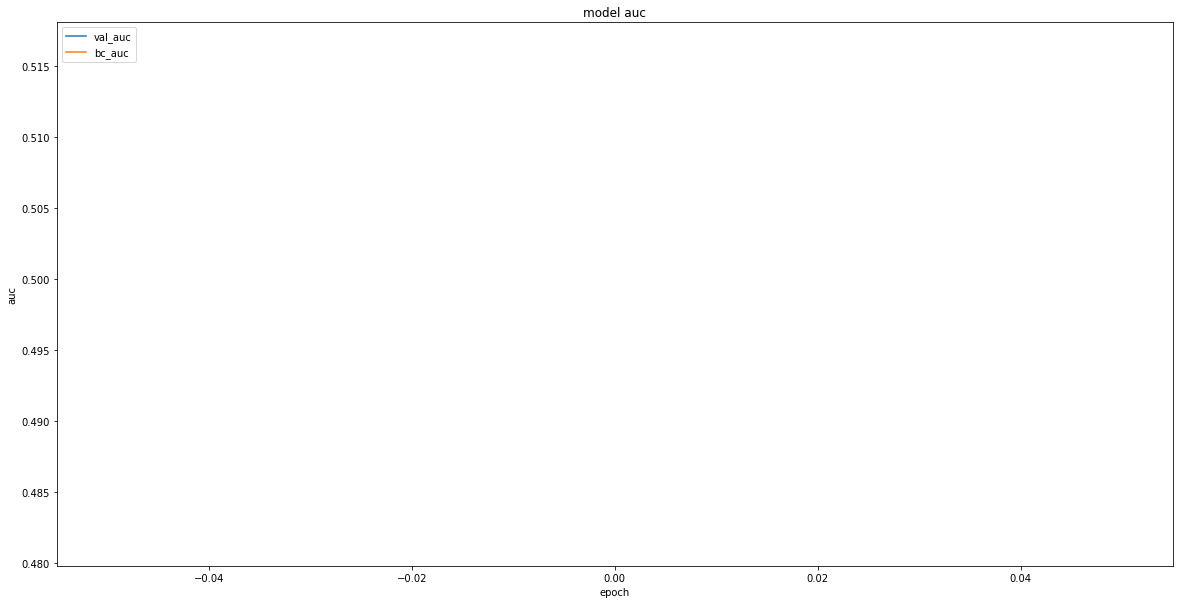

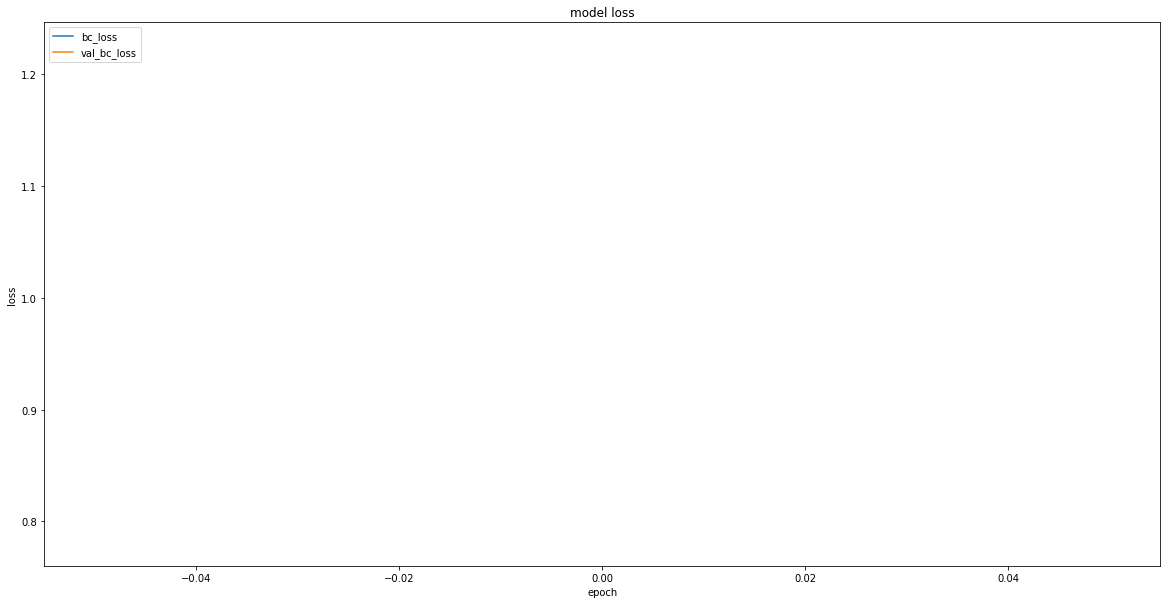

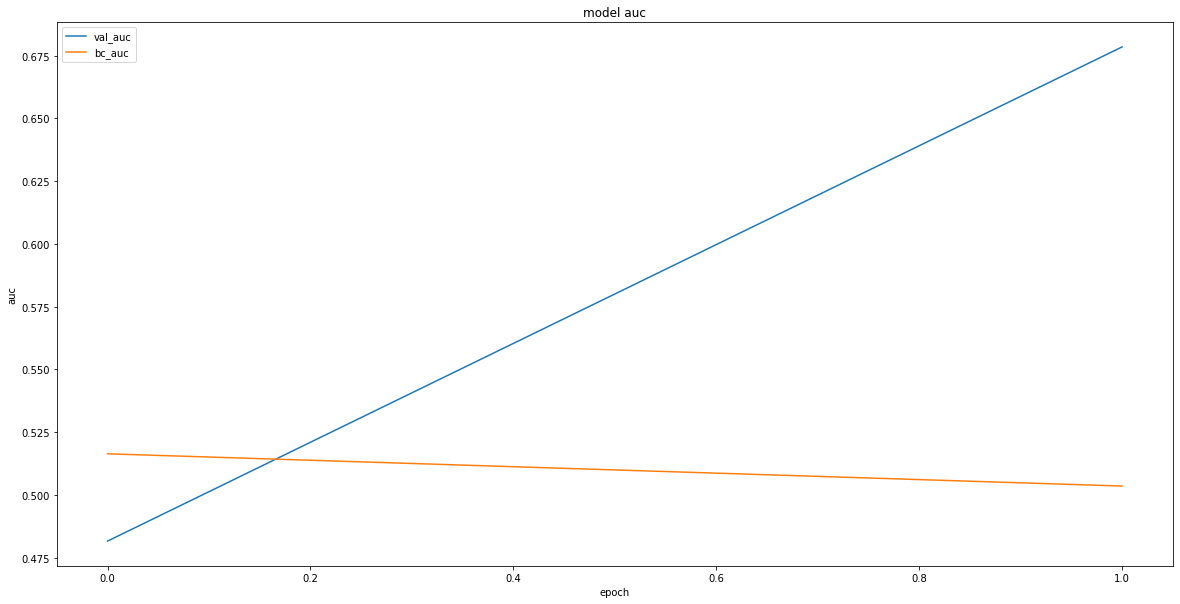

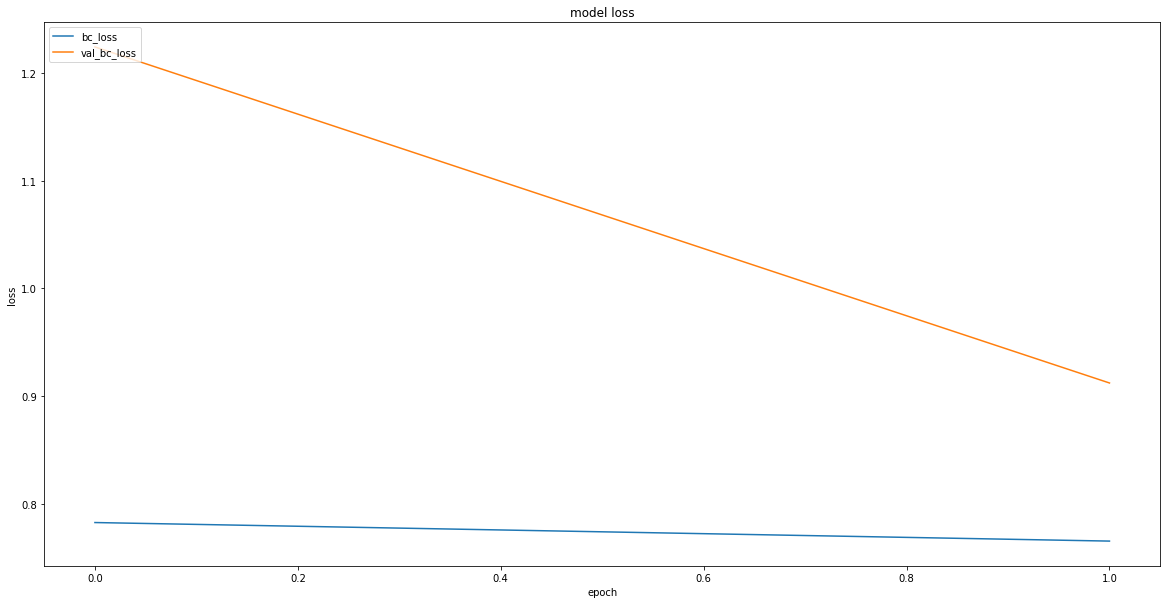

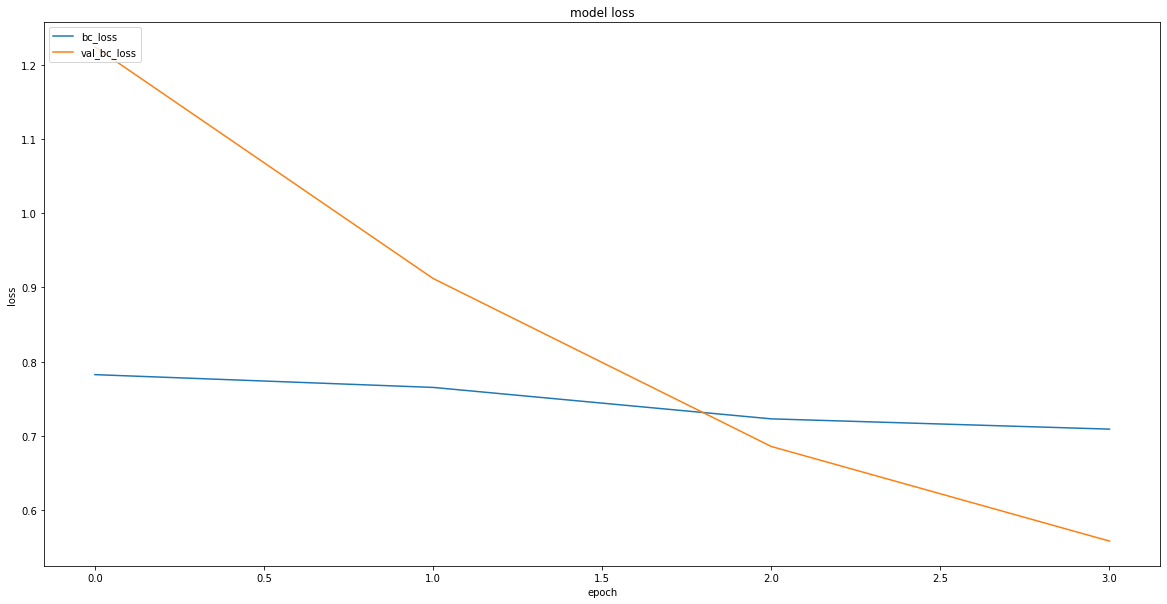

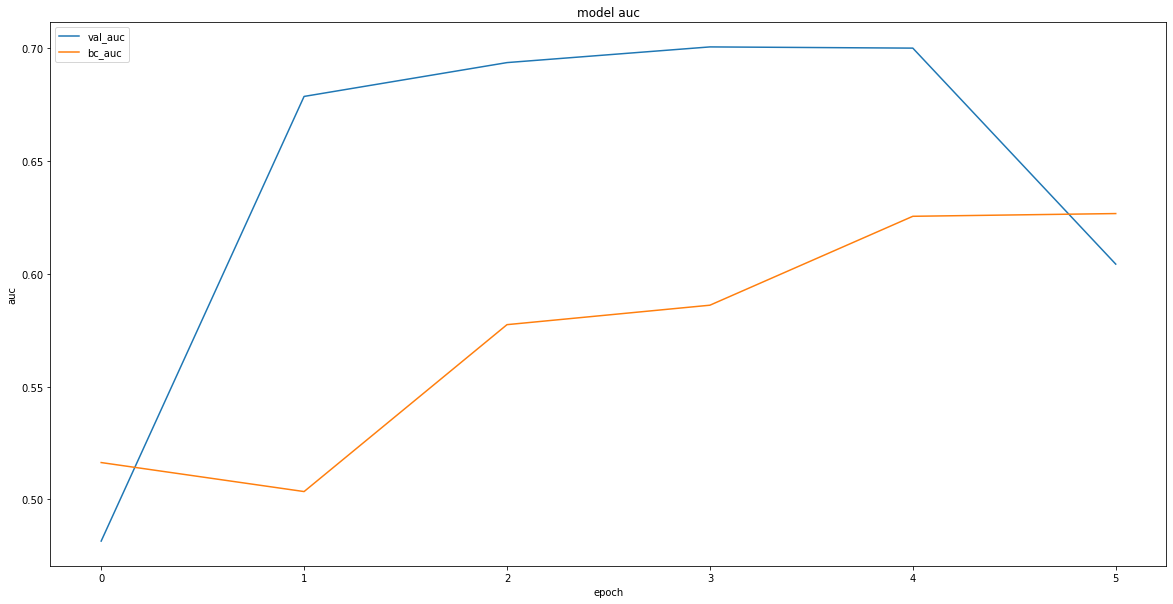

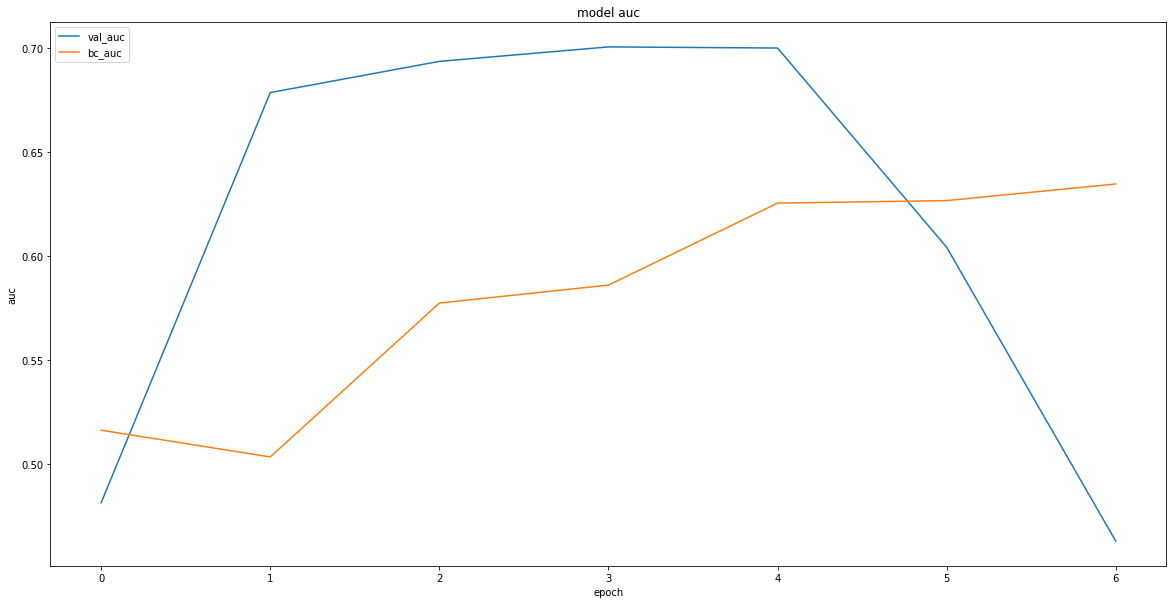

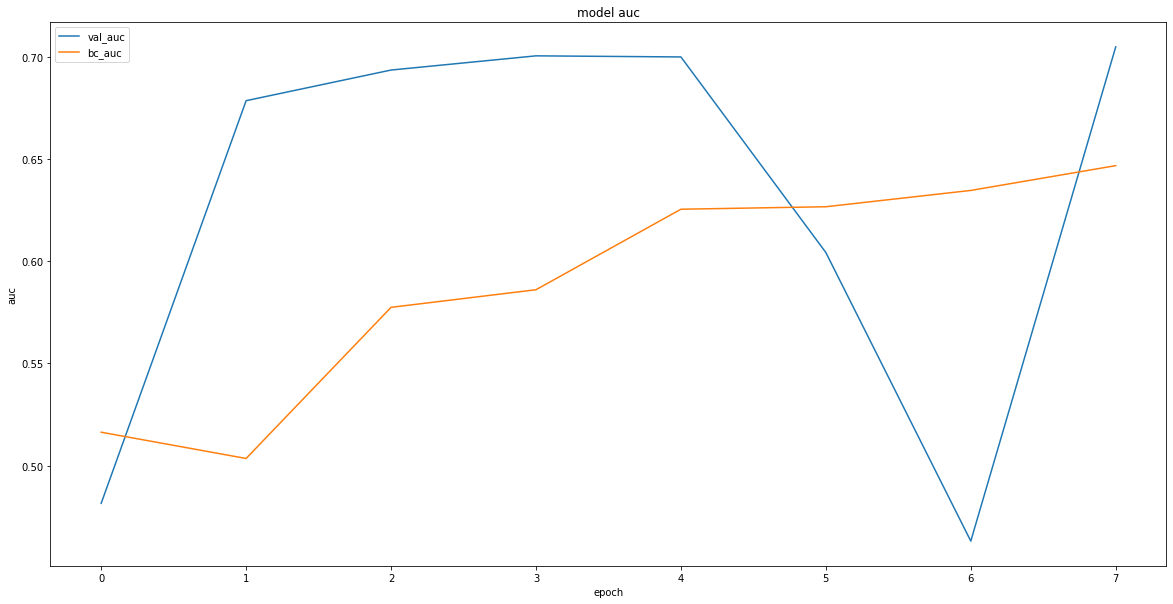

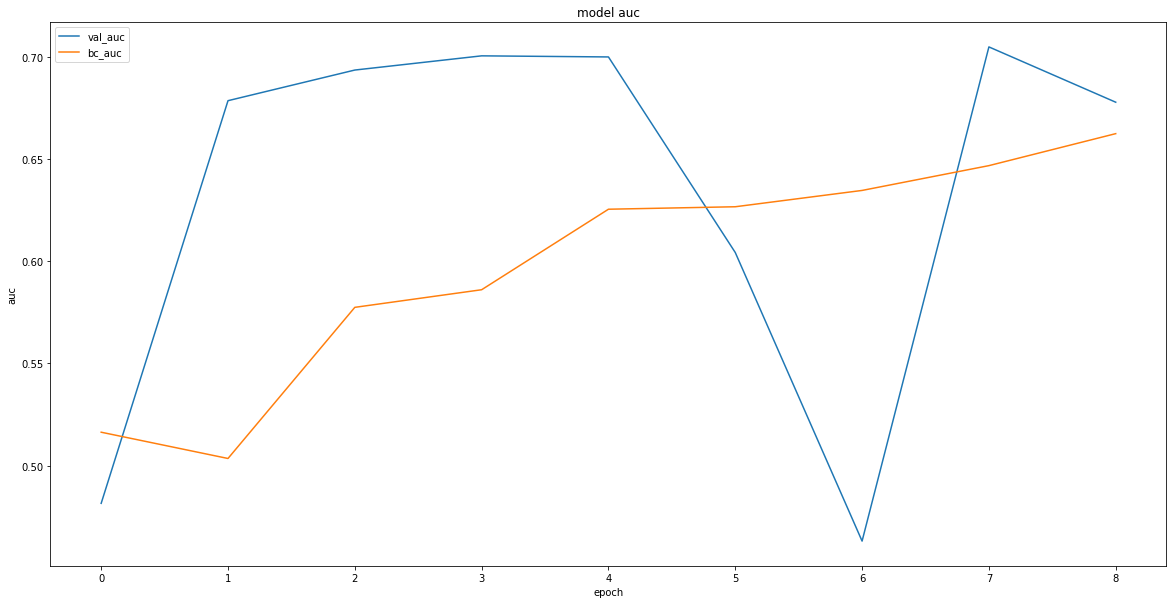

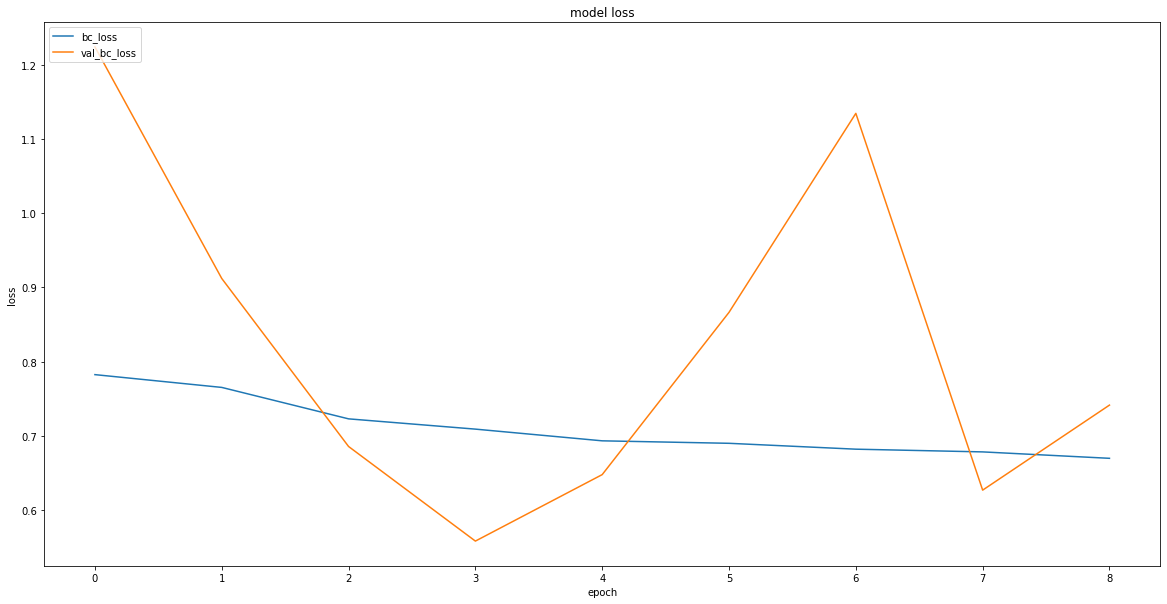

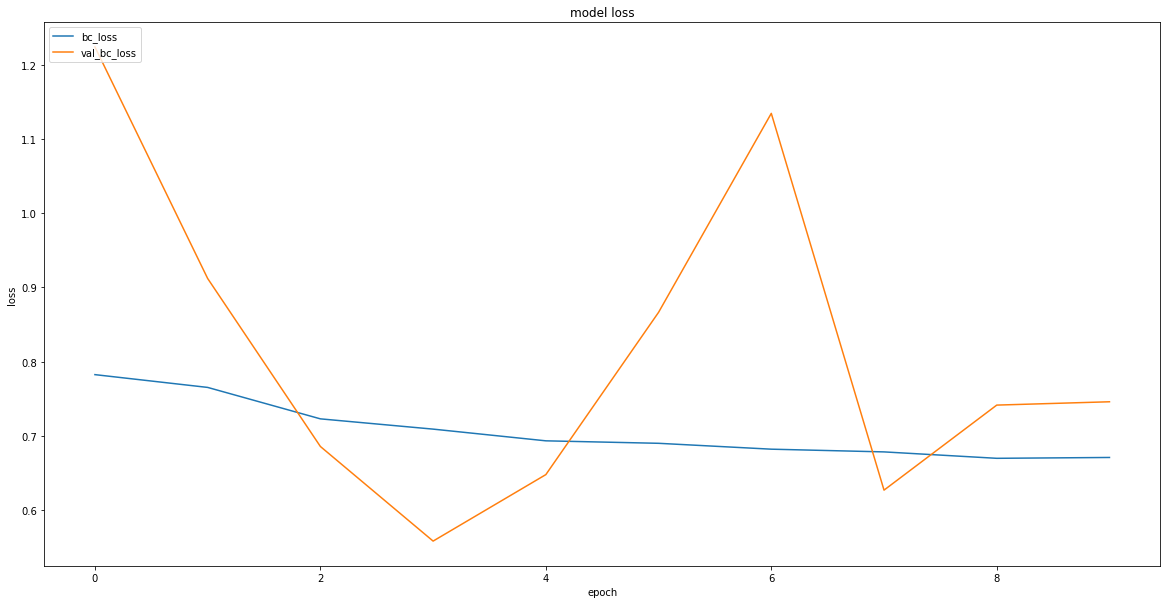

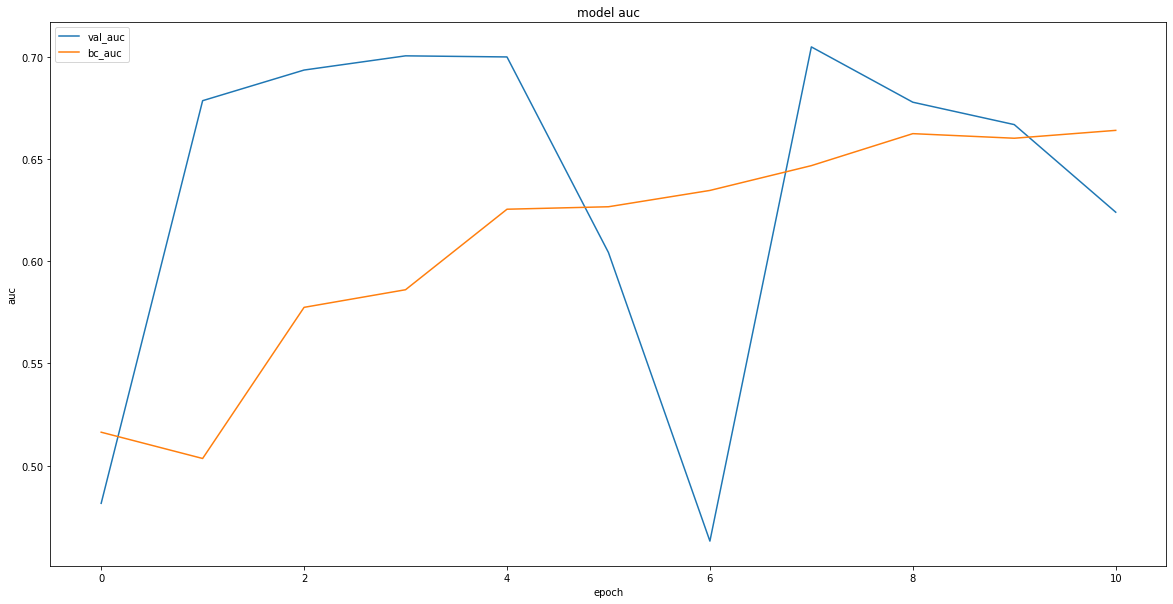

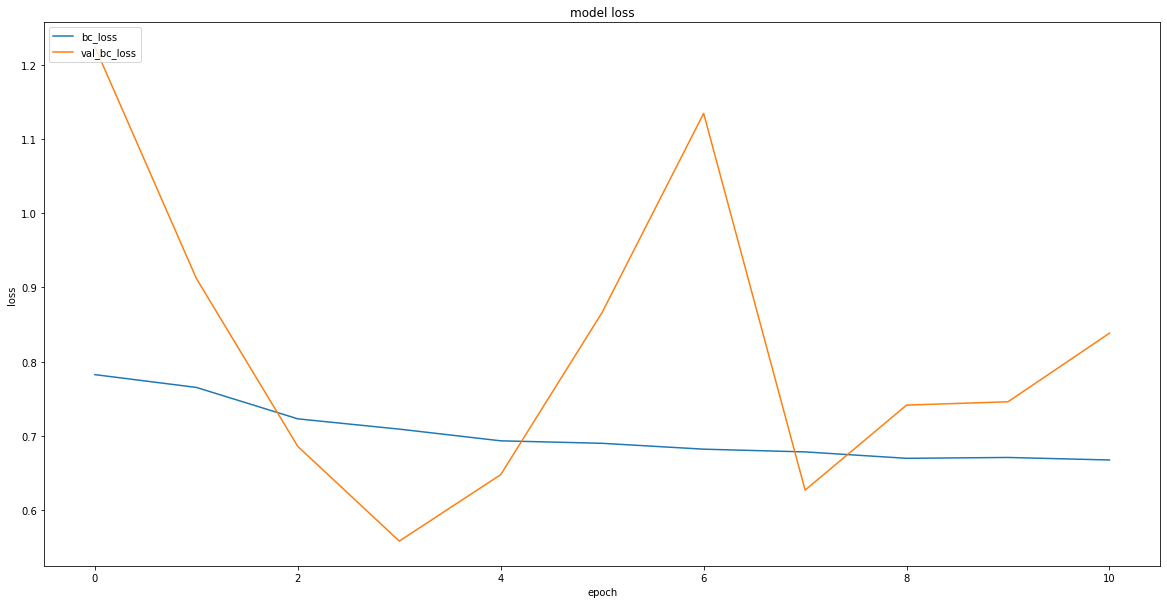

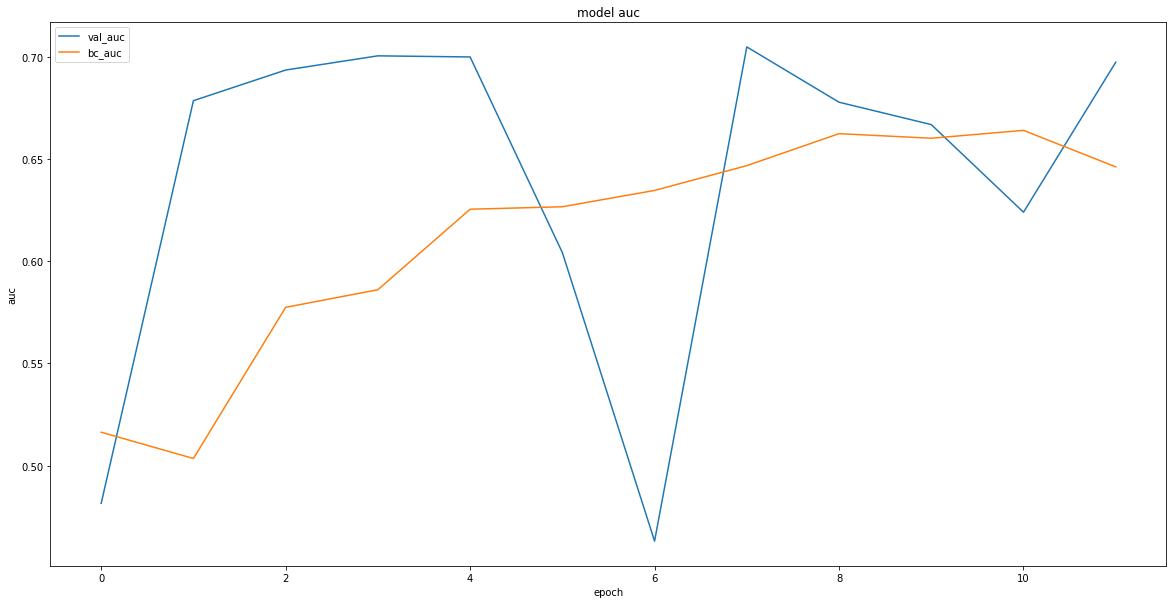

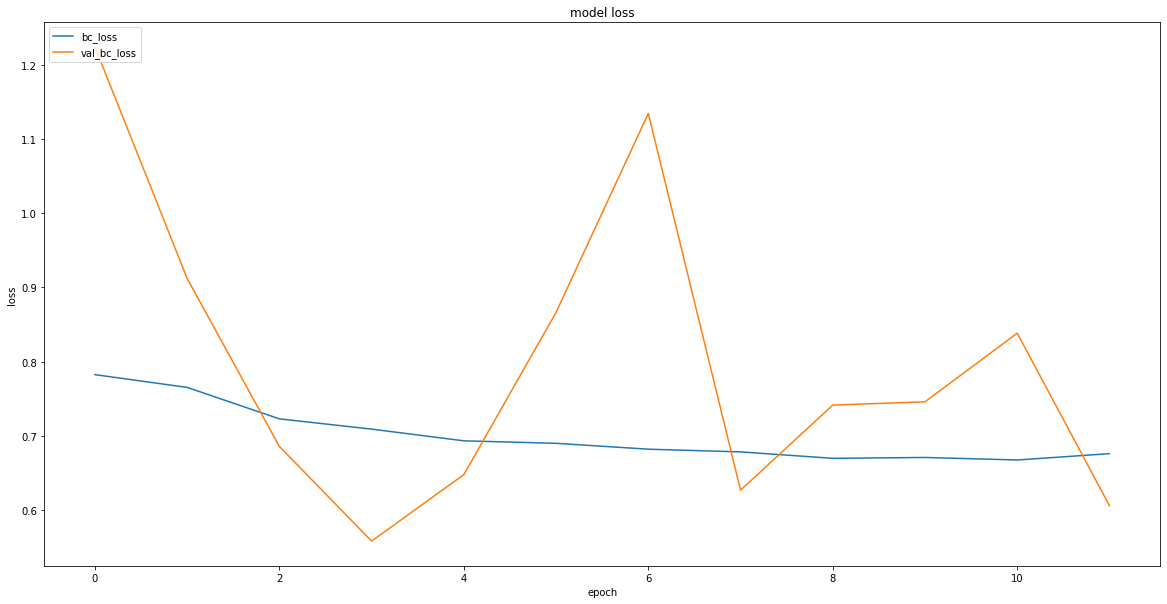

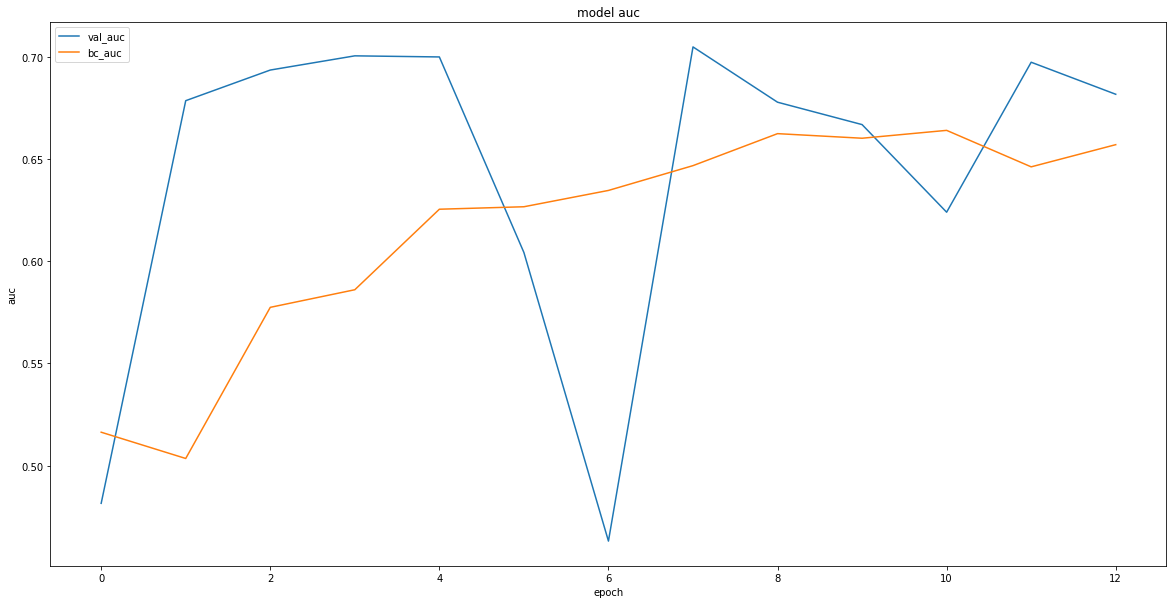

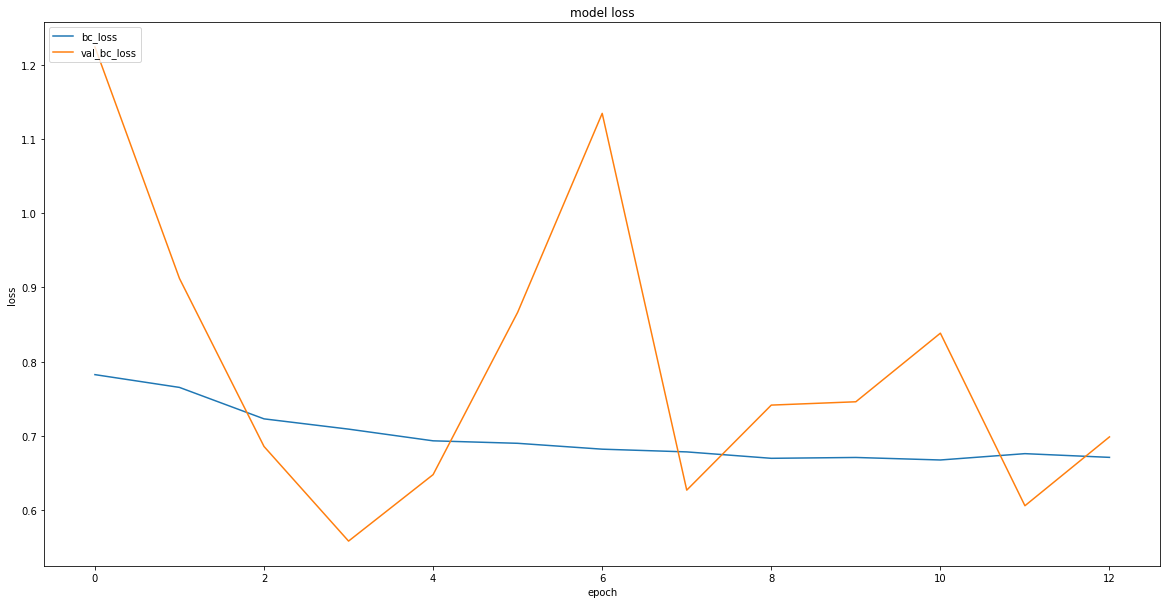

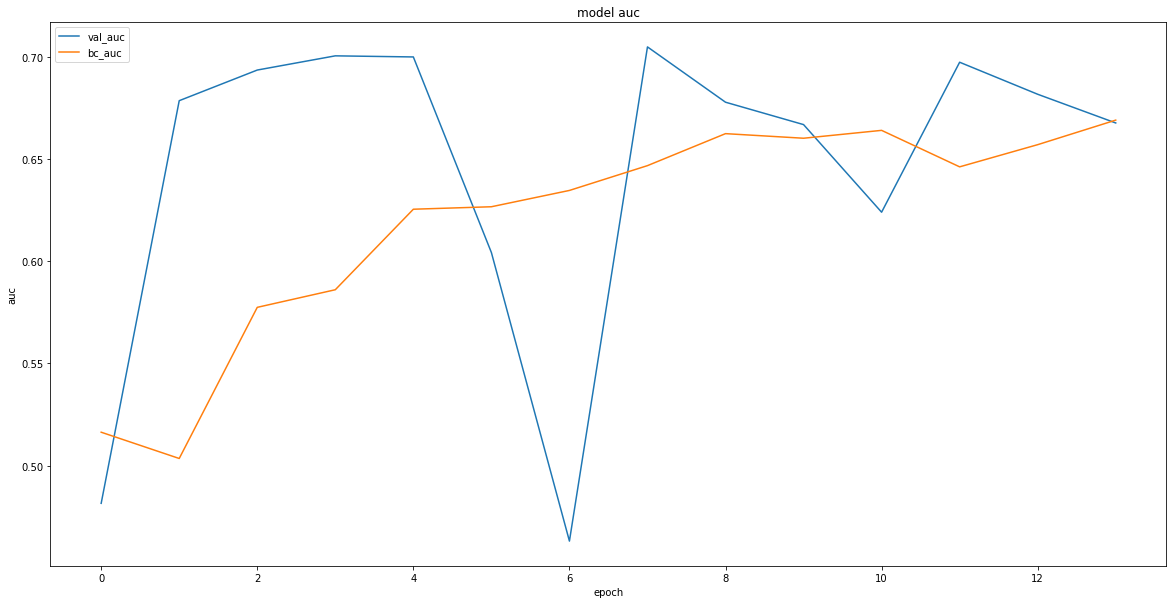

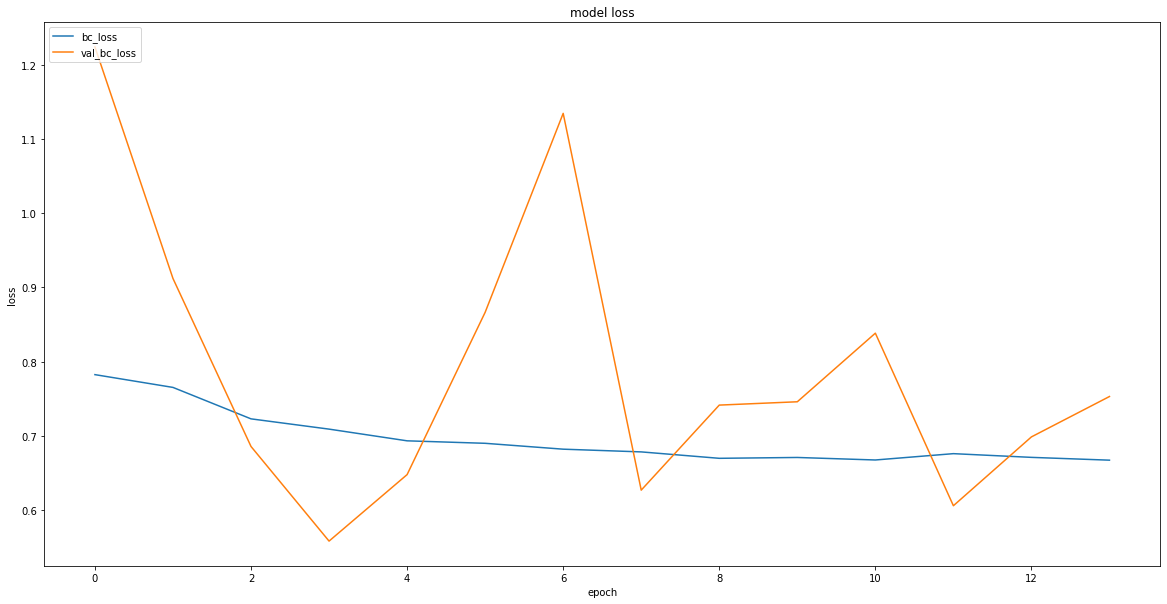

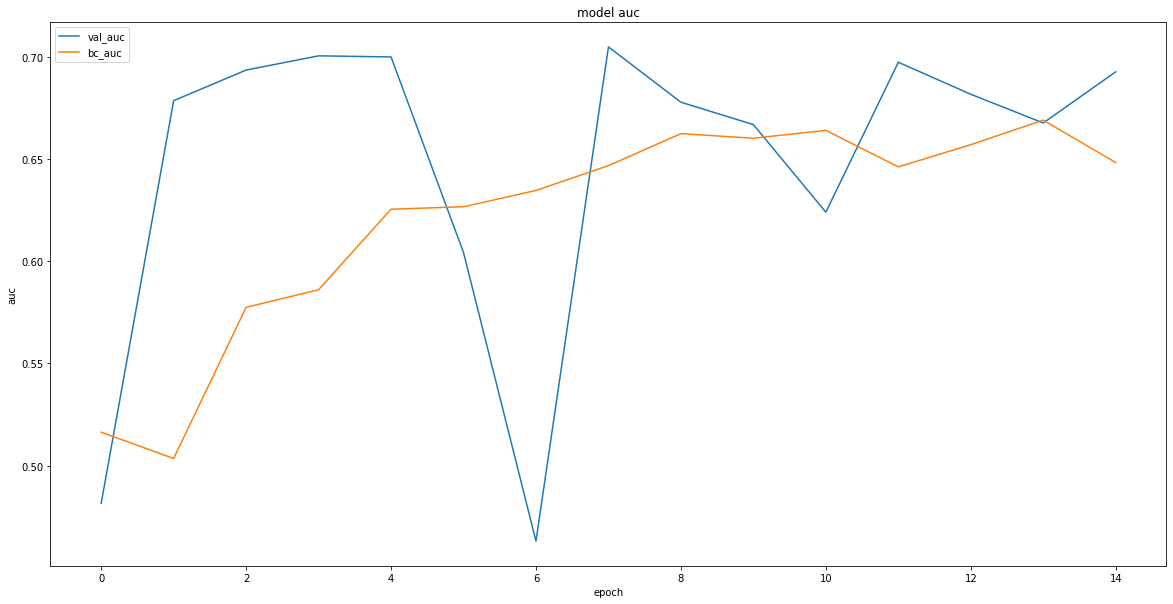

In [ ]:
wgangp.train(dataset, train_args)

In [ ]:
# sys.stdout = old_stdout

In [ ]:
wgangp.load_model()

In [ ]:
test_dataset = construct_test_dataset()

In [436]:
wgangp.print_fakes_for_k()

For label ******  [[3]]
    item_id  category        day      hour     month   weekday   dwelltime  \
0      10.0      91.0  16.303444  2.191737  5.963846  3.464478   14.644484   
1       7.0      46.0  14.211267  1.900424  6.107927  2.881897   29.309225   
2      10.0     193.0  15.467532  1.578327  6.793277  3.692277  -18.310274   
3      12.0      46.0  13.989494  1.754479  6.177551  3.614729   21.977751   
4       8.0      46.0  13.475451  1.978425  5.533880  2.601604   50.121861   
5      11.0     128.0  12.445725  2.508998  4.045904  3.186588   72.597450   
6      12.0     128.0  11.635093  2.718383  3.587824  2.318582  120.411171   
7       1.0     126.0  14.097722  2.556441  3.933741  2.001731   74.661278   
8       1.0       3.0  12.374912  1.935923  5.139169  2.812258   43.353710   
9       1.0      46.0  10.041069  2.299684  6.880460  2.415478   64.899551   
10     12.0      46.0  10.187555  2.389169  6.553276  2.770923  -18.506990   
11      8.0      46.0   7.065170  2.3884

In [147]:
from sklearn.metrics import classification_report
 
X_test, y_test, _, test_inp_len = test_dataset['all_test']
y_pred = wgangp.buyer_classifier.predict(DataGenerator(X_test, (y_test), valid_inp_len, 13, 512, use_len_in=False), verbose=1)



362/362 [==============================] - 19s 51ms/step


In [150]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.768966456590322

In [152]:

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred > 0.5, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.69      0.81    174896
     class 1       0.12      0.73      0.20     10099

    accuracy                           0.69    184995
   macro avg       0.55      0.71      0.51    184995
weighted avg       0.93      0.69      0.78    184995



In [ ]:
del test_dataset

In [ ]:
wgangp.discriminator.evaluate(DataGenerator(X_test, (y_test), 13, valid_inp_len, batch_size), verbose=1)

In [ ]:
Counter(np.argmax(y_pred,axis=1))

In [ ]:


from matplotlib import pyplot as plt

plt.plot(wgangp.d_loss1_list)
plt.plot(wgangp.d_loss2_list)
plt.plot(wgangp.g_loss_list)

# plt.plot(wgangp.val_loss_list)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['d_loss1', 'd_loss2', 'g_loss'], loc='upper left')
plt.show()

In [ ]:

from matplotlib import pyplot as plt


plt.plot(wgangp.bc_loss_list)
plt.plot(wgangp.val_loss_list)
# plt.plot(wgangp.val_loss_list)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['bc_loss', 'val_bc_loss'], loc='upper left')
plt.show()

In [ ]:

from matplotlib import pyplot as plt

plt.plot(wgangp.val_auc_list)
plt.plot(wgangp.bc_auc_list)

plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['val_auc','bc_auc'], loc='upper left')
plt.show()

In [ ]:
smooth_positive_labels(np.array([1,1,1,1]))

In [ ]:
wgangp.best_val_auc

In [ ]:
init_iter = wgangp.last_iteration
init_iter

In [ ]:
wgangp.evaluate_buyer_classifier(dataset)

In [ ]:

import lib.input.single_stg.scale as scale
from lib.models.single_stage import training
from lib.utils import process_input
from imp import reload
    # Do some things.
single = reload(single)
process_input = reload(process_input)

In [ ]:

create_readable_df_stg(X_train[2], get_gen_outs(),encoders)

## Transfer

In [ ]:
wgangp.load_model()

In [ ]:
from tensorflow.keras.models import Sequential

buyer_classifier = wgangp.discriminator
base_model = buyer_classifier.layers[:-4]
print(base_model)

X_in = Input(shape=(N,F))        
label_in = Input(shape=(1,))
input_shape=(None,N,F)


    
x = base_model[-1].output    

x  =  Dense(32,activation='relu')(x)
x  = Dense(32,activation='relu')(x)
x = Flatten()(x)
x = Dense(1,'sigmoid')(x)

model =  Model(inputs=buyer_classifier.input, outputs=x)
model.compile(optimizer = Adam(),loss = 'binary_crossentropy', metrics = ['accuracy', AUC(name='auc', multi_label=False)])
model.summary()

In [ ]:
X_train, y_train, _,train_inp_len = dataset['all_train_under']
X_valid, y_valid, _, valid_inp_len = dataset['all_valid']

In [ ]:
    
batch_size = 1024

validD = DataGenerator(X_valid, (y_valid), valid_inp_len, 13, 1024, use_len_in=False)
def evalu():
    print(wgangp.buyer_classifier.evaluate(validD))

class Eval(keras.callbacks.Callback):
    def __init__(self, validD, validation=None):
        super(Eval, self).__init__()
        self.validD = validD
        self.valid_loss, self.valid_acc, self.valid_auc = [],[],[]
    
#     def on_train_begin(self, logs={}):
        
    def on_epoch_end(self, batch, logs={}):
        loss, acc, auc = wgangp.buyer_classifier.evaluate(self.validD)
        self.valid_loss.append(loss)
        self.valid_acc.append(acc)
        self.valid_auc.append(auc)



bc_loss, bc_acc, bc_auc = model.fit(
    DataGenerator(X_train[:], (y_train),  train_inp_len, 13,  256, use_len_in=False),
    validation_data=validD,
    #callbacks = [Eval(validD)],
    epochs=30)
        

## Train classifier


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

In [ ]:
wgangp.load_model()

In [48]:
X_train, y_train, _,train_inp_len = dataset['all_train_under']
X_valid, y_valid, _, valid_inp_len = dataset['all_valid']

In [ ]:
d = Counter(y_train)
print(d)
buyers = d[1]

In [ ]:
np.random.randint(0,2,20)

In [ ]:
from scipy import sparse

n_samples = buyers//2
print(n_samples)
z_input, len_labels, labels_input = wgangp.generate_latent_points(n_samples)
print(Counter(labels_input))


In [ ]:
X_fake = wgangp.generator.predict([z_input, labels_input ])

X_fake = [sparse.csr_matrix(k) for k in X_fake]
y_fake = np.array(labels_input)

In [ ]:
X_train = np.concatenate((X_train, X_fake))
y_train = np.concatenate((y_train, y_fake))


In [ ]:
np.save("X_fake.npy",X_fake)

In [ ]:
import gc
gc.collect()

In [ ]:
Counter(y_train)

In [ ]:
del dataset
gc.collect()

In [ ]:
isinstance(X_train[0], np.array)

In [63]:
N = 13
F = dataset['all_train_under'][0][0].toarray().shape[-1]
F,N
X_in = Input((N,F))

len_in = Input((1,))
x = X_in

use_len_label =False

if use_len_label:
    l_in = Lambda(lambda x: x[:,0])(len_in)
    l_in = Embedding(N+1, N)(l_in)
    l_in = RepeatVector(N)(l_in)
    x = Concatenate()([X_in, l_in])      

x = Masking(MASK_VALUE)(x)
x = (GRU(128, return_sequences = True,activation='relu'))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = (GRU(64, return_sequences = True,activation='relu'))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x  =  Dense(15,activation='relu')(x)
x = Dropout(0.2)(x)
x  =  Dense(15,activation='relu')(x)
x = Dropout(0.2)(x)

x  =  Dense(15,activation='relu')(x)
x = Dropout(0.2)(x)


x = Flatten()(x)
x = Dropout(0.3)(x)

x1 = Dense(1, 'sigmoid',name='disc')(x)

loss_f1 = 'binary_crossentropy'

opt = Adam(lr=1e-3)
model_in = X_in if use_len_label == False else [X_in, len_in]
model =  Model(inputs=model_in, outputs=x1)
model.compile(optimizer = opt,loss = loss_f1, metrics = ['accuracy', AUC(name='auc', multi_label=False)])

In [64]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 13, 249)]         0         
_________________________________________________________________
masking_3 (Masking)          (None, 13, 249)           0         
_________________________________________________________________
gru_8 (GRU)                  (None, 13, 128)           145536    
_________________________________________________________________
batch_normalization_8 (Batch (None, 13, 128)           512       
_________________________________________________________________
activation_8 (Activation)    (None, 13, 128)           0         
_________________________________________________________________
gru_9 (GRU)                  (None, 13, 64)            37248     
_________________________________________________________________
batch_normalization_9 (Batch (None, 13, 64)            256 

In [65]:

from tensorflow.keras.callbacks import * 
batch_size = 1024

validD = DataGenerator(X_valid, (y_valid), valid_inp_len, 13, 1024, use_len_in=use_len_label)
def evalu():
    print(wgangp.buyer_classifier.evaluate(validD))

class Eval(keras.callbacks.Callback):
    def __init__(self, validD, validation=None):
        super(Eval, self).__init__()
        self.validD = validD
        self.valid_loss, self.valid_acc, self.valid_auc = [],[],[]
    
#     def on_train_begin(self, logs={}):
        
    def on_epoch_end(self, batch, logs={}):
        loss, acc, auc = wgangp.buyer_classifier.evaluate(self.validD)
        self.valid_loss.append(loss)
        self.valid_acc.append(acc)
        self.valid_auc.append(auc)

checkpoint_filepath='./cache/normal_classifier.h5'
m = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_auc',
    mode='max',
    save_best_only=True)
model.fit(
    DataGenerator(X_train[:], (y_train),  train_inp_len, 13,  256, use_len_in=use_len_label),
    validation_data=validD,
    callbacks = [m],
    epochs=100)
        

Epoch 1/100
643/643 [==============================] - 46s 67ms/step - loss: 0.6296 - accuracy: 0.6534 - auc: 0.6971 - val_loss: 0.4309 - val_accuracy: 0.8104 - val_auc: 0.7586
Epoch 2/100
643/643 [==============================] - 42s 65ms/step - loss: 0.5661 - accuracy: 0.7172 - auc: 0.7817 - val_loss: 0.6509 - val_accuracy: 0.6882 - val_auc: 0.7588
Epoch 3/100
643/643 [==============================] - 41s 63ms/step - loss: 0.5431 - accuracy: 0.7301 - auc: 0.8011 - val_loss: 0.9455 - val_accuracy: 0.4093 - val_auc: 0.7512
Epoch 4/100
643/643 [==============================] - 41s 64ms/step - loss: 0.5244 - accuracy: 0.7412 - auc: 0.8162 - val_loss: 0.9255 - val_accuracy: 0.4920 - val_auc: 0.7506
Epoch 5/100
643/643 [==============================] - 41s 64ms/step - loss: 0.5191 - accuracy: 0.7437 - auc: 0.8188 - val_loss: 0.9414 - val_accuracy: 0.5005 - val_auc: 0.7563
Epoch 6/100
643/643 [==============================] - 43s 67ms/step - loss: 0.5137 - accuracy: 0.7461 - auc: 0.823

KeyboardInterrupt: 

In [69]:
model.load_weights(checkpoint_filepath)

In [70]:
# test_dataset = construct_test_dataset()

In [71]:
from sklearn.metrics import classification_report
 
X_test, y_test, _, test_inp_len = test_dataset['all_test']
y_pred = model.predict(DataGenerator(X_test, (y_test), test_inp_len, 13, batch_size, use_len_in=False), verbose=1)



181/181 [==============================] - 16s 90ms/step


In [72]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.7815679695087792

In [73]:

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred > 0.5, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.76      0.85    174896
     class 1       0.14      0.69      0.23     10099

    accuracy                           0.75    184995
   macro avg       0.56      0.72      0.54    184995
weighted avg       0.93      0.75      0.82    184995



In [ ]:
del test_dataset